#  Libararies

In [29]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

# Import the twitter data + process
- https://www.youtube.com/watch?v=jtIMnmbnOFo
- https://datascienceparichay.com/article/remove-time-from-date-pandas/

In [34]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
"""
query = "AAPL lang:en until:2022-09-20 since:2022-06-01"
tweets = []
limit = 100000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'Tweet'])
print(df)

# to save to csv
# df.to_csv('tweets.csv')

"""
df = pd.read_csv("/Users/kafiaelmi/Downloads/stock_tweets2.csv", encoding='latin-1')
print(df)

                            Date  \
0      2022-09-29 23:41:16+00:00   
1      2022-09-29 23:24:43+00:00   
2      2022-09-29 23:18:08+00:00   
3      2022-09-29 22:40:07+00:00   
4      2022-09-29 22:27:05+00:00   
...                          ...   
80788  2021-10-07 17:11:57+00:00   
80789  2021-10-04 17:05:59+00:00   
80790  2021-10-01 04:43:41+00:00   
80791  2021-10-01 00:03:32+00:00   
80792  2021-09-30 10:22:52+00:00   

                                                   Tweet Stock Name  \
0      Mainstream media has done an amazing job at br...       TSLA   
1      Tesla delivery estimates are at around 364k fr...       TSLA   
2      3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3      @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4      @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   
...                                                  ...        ...   
80788  Some of the fastest growing tech stocks on the...       XPEV   

In [35]:
df.head()

Date  \
0  2022-09-29 23:41:16+00:00   
1  2022-09-29 23:24:43+00:00   
2  2022-09-29 23:18:08+00:00   
3  2022-09-29 22:40:07+00:00   
4  2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.  
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.  
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.  
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.  
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.

In [36]:
df['Stock Name'].nunique()

25

In [49]:
df = df[df['Stock Name'].str.contains('^TSLA', na=False)]

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37422 entries, 0 to 37421
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          37422 non-null  object
 1   Tweet         37422 non-null  object
 2   Stock Name    37422 non-null  object
 3   Company Name  37422 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [50]:
df['Date'] = pd.to_datetime(df['Date'])

In [51]:
# remove time from Date and store it in a new column
df['Date'] = df['Date'].dt.date
# display the dataframe
df.tail()

Date                                              Tweet  \
37417  2021-09-30  Playing in the dirt and #chasingsunsets\n@tesl...   
37418  2021-09-30  I agree with @freshjiva that $TSLA âs EV bus...   
37419  2021-09-30                             Hold. On. Tight. $TSLA   
37420  2021-09-30  Get ready for a $TSLA _ _ _ _ _ _  Q3 delivery...   
37421  2021-09-30  In other words, AMD has been giving Tesla pref...   

      Stock Name Company Name  
37417       TSLA  Tesla, Inc.  
37418       TSLA  Tesla, Inc.  
37419       TSLA  Tesla, Inc.  
37420       TSLA  Tesla, Inc.  
37421       TSLA  Tesla, Inc.

In [52]:
df['Date'].nunique()

365

In [53]:
import copy
df3 = copy.deepcopy(df)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37422 entries, 0 to 37421
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          37422 non-null  object
 1   Tweet         37422 non-null  object
 2   Stock Name    37422 non-null  object
 3   Company Name  37422 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [54]:
df3 = (pd.to_datetime(df3['Date'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('Date')
       .reset_index(name='Count'))
print (df3)

          Date  Count
0   2021-10-25    462
1   2022-04-20    350
2   2022-01-26    314
3   2022-01-03    307
4   2022-07-20    269
..         ...    ...
360 2022-09-25     36
361 2022-07-16     35
362 2022-03-05     35
363 2022-09-05     35
364 2022-02-26     33

[365 rows x 2 columns]


In [57]:
cummulatief = df3['Count'].sum()
e = cummulatief/365
e

102.52602739726028

In [58]:
import plotly.express as px
fig = px.bar(df3, x='Date', y='Count')
fig.show()

In [59]:
df3['counts'] = df3['Date'].value_counts()
df3

Date  Count  counts
0   2021-10-25    462     NaN
1   2022-04-20    350     NaN
2   2022-01-26    314     NaN
3   2022-01-03    307     NaN
4   2022-07-20    269     NaN
..         ...    ...     ...
360 2022-09-25     36     NaN
361 2022-07-16     35     NaN
362 2022-03-05     35     NaN
363 2022-09-05     35     NaN
364 2022-02-26     33     NaN

[365 rows x 3 columns]

In [60]:
df3

Date  Count  counts
0   2021-10-25    462     NaN
1   2022-04-20    350     NaN
2   2022-01-26    314     NaN
3   2022-01-03    307     NaN
4   2022-07-20    269     NaN
..         ...    ...     ...
360 2022-09-25     36     NaN
361 2022-07-16     35     NaN
362 2022-03-05     35     NaN
363 2022-09-05     35     NaN
364 2022-02-26     33     NaN

[365 rows x 3 columns]

In [61]:
df['Date']

0        2022-09-29
1        2022-09-29
2        2022-09-29
3        2022-09-29
4        2022-09-29
            ...    
37417    2021-09-30
37418    2021-09-30
37419    2021-09-30
37420    2021-09-30
37421    2021-09-30
Name: Date, Length: 37422, dtype: object

In [62]:
print(type(df['Date']))

<class 'pandas.core.series.Series'>


Convert the date to datetime64

In [63]:
# Convert the date to datetime64
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Historical data + process

import libraries for historical data

In [64]:
# Make sure that you have all these libaries available to run the code successfully
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [65]:
dfh = pd.read_csv("/Users/kafiaelmi/Downloads/TSLA.csv") 
dfh.tail()
dfh.describe()
dfh.info()
dfh.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


Date        Open        High         Low       Close   Adj Close  \
0  2022-01-12  359.616669  371.613342  357.529999  368.739990  368.739990   
1  2022-01-13  369.690002  371.866669  342.179993  343.853333  343.853333   
2  2022-01-14  339.959991  350.666656  337.793335  349.869995  349.869995   
3  2022-01-18  342.203339  356.929993  338.686676  343.503326  343.503326   
4  2022-01-19  347.236664  351.556671  331.666656  331.883331  331.883331   

     Volume  
0  83739000  
1  97209900  
2  72924300  
3  66743400  
4  75442500

In [66]:
dfh['Date'].nunique()

251

# Merge the historical and tweets datasets

In [67]:
dfh['Date']=dfh['Date'].astype('datetime64')

In [68]:
df_merged = df.merge(dfh, on='Date')
df_merged.head()

Date                                              Tweet Stock Name  \
0 2022-09-29  Mainstream media has done an amazing job at br...       TSLA   
1 2022-09-29  Tesla delivery estimates are at around 364k fr...       TSLA   
2 2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3 2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4 2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   

  Company Name       Open        High         Low       Close   Adj Close  \
0  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
1  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
2  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
3  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
4  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   

     Volume  
0  77620600  
1  77620600  
2  77620600  
3  77620600  
4  77620600

In [69]:
print(type(df_merged))

<class 'pandas.core.frame.DataFrame'>


In [70]:
df_merged['Date'].nunique()

180

In [71]:
new_df = dfh.groupby('Date').agg('first').reset_index()

In [72]:
new_df.tail()

Date        Open        High         Low       Close   Adj Close  \
246 2023-01-05  110.510002  111.750000  107.160004  110.339996  110.339996   
247 2023-01-06  103.000000  114.389999  101.809998  113.059998  113.059998   
248 2023-01-09  118.959999  123.519997  117.110001  119.769997  119.769997   
249 2023-01-10  121.070000  122.760002  114.919998  118.849998  118.849998   
250 2023-01-11  122.089996  125.949997  120.510002  123.220001  123.220001   

        Volume  
246  157986300  
247  220575900  
248  190284000  
249  167642500  
250  183488800

In [73]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=new_df['Date'].index,y=new_df['Close'], mode='lines'))
fig.show()

# Cleaning the tweets
https://medium.com/@oscar.sefa/twitter-sentiment-analysis-using-python-for-beginners-1ee1bc15dc86

In [74]:
#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    text = re.sub('[^\x00-\x7F]','', text)
    return text
df_merged['cleanedTweets'] = df_merged['Tweet'].apply(cleanTweets) #apply cleanTweet function to the tweet
df_merged.head() #compares original tweets with cleaned Tweets

Date                                              Tweet Stock Name  \
0 2022-09-29  Mainstream media has done an amazing job at br...       TSLA   
1 2022-09-29  Tesla delivery estimates are at around 364k fr...       TSLA   
2 2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3 2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4 2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   

  Company Name       Open        High         Low       Close   Adj Close  \
0  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
1  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
2  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
3  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
4  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   

     Volume                                      cleanedTweets  
0  77620600  Mainstream media has done an amazing job at br...  
1  77620600  Tesla delivery estimates are at around 364k fr...  
2  77620600  3/ Even if I include 63.0M unvested RSUs as of...  
3  77620600     Hahaha why are you still trying to stop Tes...  
4  77620600    Stop trying to kill kids, you sad deranged o...

In [75]:
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

In [76]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [77]:
analyser.polarity_scores("I am getting bored in the quarantine.")

{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.2732}

In [78]:
dfdfd = df_merged['cleanedTweets']

In [79]:
dfdfd

0        Mainstream media has done an amazing job at br...
1        Tesla delivery estimates are at around 364k fr...
2        3/ Even if I include 63.0M unvested RSUs as of...
3           Hahaha why are you still trying to stop Tes...
4          Stop trying to kill kids, you sad deranged o...
                               ...                        
20001                 (Board member of ) is now following 
20002    Three $TSLA topics where TSLA bulls are violen...
20003    $TSLA Funds SpaceX - X Merger Idea  via .  X c...
20004    Polestar Meets Global Sales Target of 29,000 E...
20005         I prefer these as separate entities for m...
Name: cleanedTweets, Length: 20006, dtype: object

In [80]:
scores = []

# Declare variables for scores*
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(dfdfd.shape[0]):

#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyser.polarity_scores(dfdfd[i])["compound"]
    pos = analyser.polarity_scores(dfdfd[i])["pos"]
    neu = analyser.polarity_scores(dfdfd[i])["neu"]
    neg = analyser.polarity_scores(dfdfd[i])["neg"]

    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [81]:
dfdfd = pd.DataFrame(dfdfd)

In [82]:
sentiments_score = pd.DataFrame.from_dict(scores)
dfdfd = dfdfd.join(sentiments_score)
dfdfd.head()

cleanedTweets  Compound  Positive  \
0  Mainstream media has done an amazing job at br...    0.0772     0.115   
1  Tesla delivery estimates are at around 364k fr...    0.0000     0.000   
2  3/ Even if I include 63.0M unvested RSUs as of...    0.2960     0.046   
3     Hahaha why are you still trying to stop Tes...   -0.7568     0.146   
4    Stop trying to kill kids, you sad deranged o...   -0.8750     0.000   

   Negative  Neutral  
0     0.127    0.758  
1     0.000    1.000  
2     0.000    0.954  
3     0.292    0.562  
4     0.588    0.412

In [83]:
sentiment_scores('I am getting bored in the quarantine.')

-0.2732

# Detect sentiments
https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

In [86]:
#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df_merged['Subjectivity'] = df_merged['cleanedTweets'].apply(getSubjectivity)
df_merged['Polarity'] = df_merged['cleanedTweets'].apply(getPolarity)
df_merged.drop('Tweet', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column

Date Stock Name Company Name       Open        High         Low  \
0 2022-09-29       TSLA  Tesla, Inc.  282.76001  283.649994  265.779999   
1 2022-09-29       TSLA  Tesla, Inc.  282.76001  283.649994  265.779999   
2 2022-09-29       TSLA  Tesla, Inc.  282.76001  283.649994  265.779999   
3 2022-09-29       TSLA  Tesla, Inc.  282.76001  283.649994  265.779999   
4 2022-09-29       TSLA  Tesla, Inc.  282.76001  283.649994  265.779999   

        Close   Adj Close    Volume  \
0  268.209991  268.209991  77620600   
1  268.209991  268.209991  77620600   
2  268.209991  268.209991  77620600   
3  268.209991  268.209991  77620600   
4  268.209991  268.209991  77620600   

                                       cleanedTweets  Subjectivity  Polarity  \
0  Mainstream media has done an amazing job at br...      0.900000  0.600000   
1  Tesla delivery estimates are at around 364k fr...      0.000000  0.000000   
2  3/ Even if I include 63.0M unvested RSUs as of...      0.277273  0.018182   
3     Hahaha why are you still trying to stop Tes...      0.433333  0.079167   
4    Stop trying to kill kids, you sad deranged o...      0.600000 -0.200000   

   Count_Column_date  
0                112  
1                112  
2                112  
3                112  
4                112

In [87]:
df_merged['Count_Column_date'] = df_merged['Date'].map(df_merged['Date'].value_counts())
df_merged.head()

Date                                              Tweet Stock Name  \
0 2022-09-29  Mainstream media has done an amazing job at br...       TSLA   
1 2022-09-29  Tesla delivery estimates are at around 364k fr...       TSLA   
2 2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3 2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4 2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   

  Company Name       Open        High         Low       Close   Adj Close  \
0  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
1  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
2  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
3  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
4  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   

     Volume                                      cleanedTweets  Subjectivity  \
0  77620600  Mainstream media has done an amazing job at br...      0.900000   
1  77620600  Tesla delivery estimates are at around 364k fr...      0.000000   
2  77620600  3/ Even if I include 63.0M unvested RSUs as of...      0.277273   
3  77620600     Hahaha why are you still trying to stop Tes...      0.433333   
4  77620600    Stop trying to kill kids, you sad deranged o...      0.600000   

   Polarity  Count_Column_date  
0  0.600000                112  
1  0.000000                112  
2  0.018182                112  
3  0.079167                112  
4 -0.200000                112

In [735]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
f = df_merged['Polarity'].apply(getAnalysis)
f.value_counts() #shows the counts of tweets' polarity

Positive    9932
Neutral     6150
Negative    3924
Name: Polarity, dtype: int64

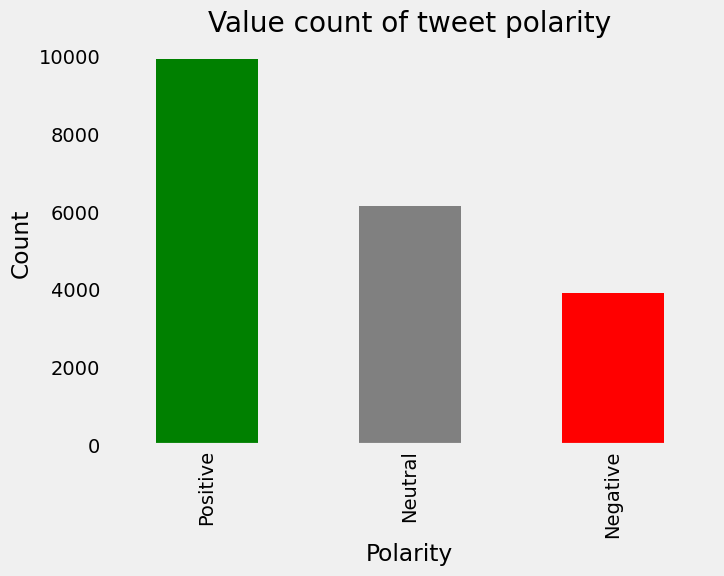

In [89]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
f.value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

In [90]:
date_polarity_df = pd.DataFrame(df_merged, columns=['Date', 'Polarity'])
# list of numbers
#list1 = [10, -21, 4, -45, 66, -93, 1]
 
pos_count, neg_count = 0, 0
 
# iterating each number in list
for num in df_merged['Polarity']:
 
    # checking condition
    if num >= 0:
        pos_count += 1
 
    else:
        neg_count += 1
 
print("Positive numbers in the list: ", pos_count)
print("Negative numbers in the list: ", neg_count)

Positive numbers in the list:  16082
Negative numbers in the list:  3924


In [91]:
df_merged1 = df_merged.groupby('Date').agg('first').reset_index()
df_merged1.head()

Date                                              Tweet Stock Name  \
0 2022-01-12  Tesla Announces Date for Q4 &amp; Full Year 20...       TSLA   
1 2022-01-13  CT being pushed to 2023 would suck, but what's...       TSLA   
2 2022-01-14  #Dogecoin is now officially on Tesla's balance...       TSLA   
3 2022-01-18  All-time record gasoline price in France:\n\nU...       TSLA   
4 2022-01-19  FREE ALERTS Recap ððµð°\n\n$F Puts paid...       TSLA   

  Company Name        Open        High         Low       Close   Adj Close  \
0  Tesla, Inc.  359.616669  371.613342  357.529999  368.739990  368.739990   
1  Tesla, Inc.  369.690002  371.866669  342.179993  343.853333  343.853333   
2  Tesla, Inc.  339.959991  350.666656  337.793335  349.869995  349.869995   
3  Tesla, Inc.  342.203339  356.929993  338.686676  343.503326  343.503326   
4  Tesla, Inc.  347.236664  351.556671  331.666656  331.883331  331.883331   

     Volume                                      cleanedTweets  Subjectivity  \
0  83739000  Tesla Announces Date for Q4 &amp; Full Year 20...         0.275   
1  97209900  CT being pushed to 2023 would suck, but what's...         0.700   
2  72924300  Dogecoin is now officially on Tesla's balance ...         0.000   
3  66743400  All-time record gasoline price in France:  USD...         0.500   
4  75442500  FREE ALERTS Recap   $F Puts paid 460%!!! $QCOM...         0.800   

   Polarity  Count_Column_date  
0  0.175000                147  
1  0.200000                156  
2  0.000000                163  
3  0.250000                 99  
4  0.738281                101

In [92]:
date_polarity_df = pd.DataFrame(df_merged, columns=['Date', 'Polarity'])
# list of numbers
#list1 = [10, -21, 4, -45, 66, -93, 1]
 
pos_count, neg_count = 0, 0
 
# iterating each number in list
for num in df_merged1['Polarity']:
 
    # checking condition
    if num >= 0:
        pos_count += 1
 
    else:
        neg_count += 1
 
print("Positive numbers in the list: ", pos_count)
print("Negative numbers in the list: ", neg_count)

Positive numbers in the list:  147
Negative numbers in the list:  33


In [93]:
pol_df = df_merged.groupby(pd.Grouper(key='Date')).sum()
pol_df.head()

Open          High           Low         Close  \
Date                                                                 
2022-09-29  31669.121120  31768.799328  29767.359888  30039.518992   
2022-09-28  21230.999025  21675.000000  20817.750525  21585.749850   
2022-09-27  24126.399660  24536.951105  23588.350850  24049.900170   
2022-09-26  19571.759064  20454.479712  19462.319856  19872.720720   
2022-09-23  24345.739656  24467.000000  23462.520602  23678.378882   

               Adj Close      Volume  Subjectivity   Polarity  \
Date                                                            
2022-09-29  30039.518992  8693507200     50.007212   7.627368   
2022-09-28  21585.749850  4099860000     29.883753  10.775944   
2022-09-27  24049.900170  5263642000     30.232075   6.580625   
2022-09-26  19872.720720  4181536800     32.052529  10.164674   
2022-09-23  23678.378882  5482362400     32.630656   7.743708   

            Count_Column_date  
Date                           
2022-09-29              12544  
2022-09-28               5625  
2022-09-27               7225  
2022-09-26               5184  
2022-09-23               7396

In [94]:
pol_df['Polarity']

Date
2022-09-29     7.627368
2022-09-28    10.775944
2022-09-27     6.580625
2022-09-26    10.164674
2022-09-23     7.743708
                ...    
2022-01-19     6.827514
2022-01-18     8.457394
2022-01-14    16.617085
2022-01-13     8.626089
2022-01-12    14.317739
Name: Polarity, Length: 180, dtype: float64

In [95]:
# iterating each number in list
for polarity in pol_df['Polarity']:
    s = 1*np.tanh(0.00075*polarity)
    print(s)
    #print(1*np.tanh(0.75*polarity))

0.005720463769949542
0.008081782025373949
0.004935428540995117
0.007623357998026432
0.00580771586125055
0.006032127412812311
0.004346142142576204
0.005559369183693326
0.006073689179164472
0.006429452642804363
0.00805600503254983
0.008739607135458372
0.005619776160936174
0.005761603993424412
0.008813831928011048
0.009321577489137837
0.006541638963535925
0.0068574844970255115
0.010223316925299876
0.00419126878774555
0.004569904785049646
0.008306616389751829
0.005327918706256464
0.006266477578986608
0.01367256716233874
0.0069713501135568335
0.005877251231084989
0.010470568200270659
0.005992726168931062
0.0051257888754872175
0.00492433429403886
0.011233508431965774
0.010336867784571104
0.008509916222074221
0.008094102211123777
0.01899360066307022
0.00680181898396304
0.008746368057407788
0.011411331614283666
0.015029994978140499
0.01065843459119217
0.008104731671382254
0.00969938196382977
0.01141425338406247
0.007271830062136055
0.004813535265932246
0.005857412087243376
0.009689401841256187

In [96]:
# iterating each number in list
for polarity in pol_df['Polarity']:
    r = polarity *0.75
    #print(r)
    s = 1*np.tanh(r)
    print(s)
    #print(1*np.tanh(0.75*polarity))

0.9999785098507756
0.9999998089573028
0.9998966967480647
0.9999995221000433
0.9999819510701597
0.999988478085587
0.9996643225023745
0.9999703402771738
0.9999893971301569
0.9999947952448504
0.9999997988493186
0.9999999487480495
0.9999737156435595
0.9999802073165972
0.9999999558190961
0.999999983997931
0.9999958413475025
0.9999977889386473
0.9999999973645162
0.9995424700775766
0.9997854211548903
0.9999998781491133
0.9999528800755508
0.9999927895243477
0.9999999999973427
0.9999982392660238
0.9999842944825729
0.9999999983927714
0.9999875333673478
0.9999294053116499
0.9998943790511977
0.9999999996506038
0.9999999978999922
0.9999999188605189
0.9999998136074437
0.9999999999999999
0.9999975285408148
0.9999999494364582
0.9999999997551822
0.9999999999998241
0.9999999988962245
0.99999981752838
0.9999999924839501
0.9999999997566088
0.9999990346448656
0.9998681787366663
0.9999836587691352
0.9999999923324063
0.999992200172485
0.9999999999999979
1.0
0.9999939047487469
0.9999856884398879
0.99995629152

In [97]:
r = pol_df['Polarity']

In [98]:
pol_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2022-09-29 to 2022-01-12
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               180 non-null    float64
 1   High               180 non-null    float64
 2   Low                180 non-null    float64
 3   Close              180 non-null    float64
 4   Adj Close          180 non-null    float64
 5   Volume             180 non-null    int64  
 6   Subjectivity       180 non-null    float64
 7   Polarity           180 non-null    float64
 8   Count_Column_date  180 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 14.1 KB


In [99]:
df_merged12 = pol_df.merge(df_merged1, on='Date')
df_merged12.head()
df_merged12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 180 non-null    datetime64[ns]
 1   Open_x               180 non-null    float64       
 2   High_x               180 non-null    float64       
 3   Low_x                180 non-null    float64       
 4   Close_x              180 non-null    float64       
 5   Adj Close_x          180 non-null    float64       
 6   Volume_x             180 non-null    int64         
 7   Subjectivity_x       180 non-null    float64       
 8   Polarity_x           180 non-null    float64       
 9   Count_Column_date_x  180 non-null    int64         
 10  Tweet                180 non-null    object        
 11  Stock Name           180 non-null    object        
 12  Company Name         180 non-null    object        
 13  Open_y               180 non-null  

In [100]:
df_merged12['Count_Column_date_y']

0      112
1       75
2       85
3       72
4       86
      ... 
175    101
176     99
177    163
178    156
179    147
Name: Count_Column_date_y, Length: 180, dtype: int64

In [101]:
df_merged12['Polarity_x']

0       7.627368
1      10.775944
2       6.580625
3      10.164674
4       7.743708
         ...    
175     6.827514
176     8.457394
177    16.617085
178     8.626089
179    14.317739
Name: Polarity_x, Length: 180, dtype: float64

In [102]:
df_merged12['polaritymean'] = df_merged12['Polarity_x']/df_merged12['Count_Column_date_y']
print(df_merged12['polaritymean'])
df_dateandpolarity = df_merged12['polaritymean'], df_merged12['Date']

0      0.068102
1      0.143679
2      0.077419
3      0.141176
4      0.090043
         ...   
175    0.067599
176    0.085428
177    0.101945
178    0.055295
179    0.097400
Name: polaritymean, Length: 180, dtype: float64


In [103]:
print((sum(df_merged12['polaritymean']))/(len(df_merged12['polaritymean'])))

0.10100204433104806


In [104]:
df_merged12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 180 non-null    datetime64[ns]
 1   Open_x               180 non-null    float64       
 2   High_x               180 non-null    float64       
 3   Low_x                180 non-null    float64       
 4   Close_x              180 non-null    float64       
 5   Adj Close_x          180 non-null    float64       
 6   Volume_x             180 non-null    int64         
 7   Subjectivity_x       180 non-null    float64       
 8   Polarity_x           180 non-null    float64       
 9   Count_Column_date_x  180 non-null    int64         
 10  Tweet                180 non-null    object        
 11  Stock Name           180 non-null    object        
 12  Company Name         180 non-null    object        
 13  Open_y               180 non-null  

In [105]:
df_complete = pd.DataFrame({'Date': df_merged12['Date'],'polaritymean': df_merged12['polaritymean'], 'Open': df_merged1['Open'], 'High': df_merged1['High'], 'Low':df_merged1['High'], 'Low':df_merged1['Low'], 'Close':df_merged1['Close'], 'Adj Close': df_merged1['Adj Close'], 'Volume': df_merged1['Volume']})

In [106]:
df_complete.head()

Date  polaritymean        Open        High         Low       Close  \
0 2022-09-29      0.068102  359.616669  371.613342  357.529999  368.739990   
1 2022-09-28      0.143679  369.690002  371.866669  342.179993  343.853333   
2 2022-09-27      0.077419  339.959991  350.666656  337.793335  349.869995   
3 2022-09-26      0.141176  342.203339  356.929993  338.686676  343.503326   
4 2022-09-23      0.090043  347.236664  351.556671  331.666656  331.883331   

    Adj Close    Volume  
0  368.739990  83739000  
1  343.853333  97209900  
2  349.869995  72924300  
3  343.503326  66743400  
4  331.883331  75442500

In [107]:
print((sum(df_merged12['polaritymean']))/(len(df_merged12['polaritymean'])))

0.10100204433104806


In [108]:
df_complete.loc[df_complete["polaritymean"] < 0.10100204433104806, "polaritymean"] = df_complete["polaritymean"]*-1

In [109]:
df_complete.head()

Date  polaritymean        Open        High         Low       Close  \
0 2022-09-29     -0.068102  359.616669  371.613342  357.529999  368.739990   
1 2022-09-28      0.143679  369.690002  371.866669  342.179993  343.853333   
2 2022-09-27     -0.077419  339.959991  350.666656  337.793335  349.869995   
3 2022-09-26      0.141176  342.203339  356.929993  338.686676  343.503326   
4 2022-09-23     -0.090043  347.236664  351.556671  331.666656  331.883331   

    Adj Close    Volume  
0  368.739990  83739000  
1  343.853333  97209900  
2  349.869995  72924300  
3  343.503326  66743400  
4  331.883331  75442500

In [110]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          180 non-null    datetime64[ns]
 1   polaritymean  180 non-null    float64       
 2   Open          180 non-null    float64       
 3   High          180 non-null    float64       
 4   Low           180 non-null    float64       
 5   Close         180 non-null    float64       
 6   Adj Close     180 non-null    float64       
 7   Volume        180 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 16.7 KB


In [111]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0.0:
        return 'Negative'
    elif score ==0.0:
        return 'Neutral'
    else:
        return 'Positive'
    
v = df_complete['polaritymean'].apply(getAnalysis)
v.value_counts() #shows the counts of tweets' polarity

Positive    102
Negative     78
Name: polaritymean, dtype: int64

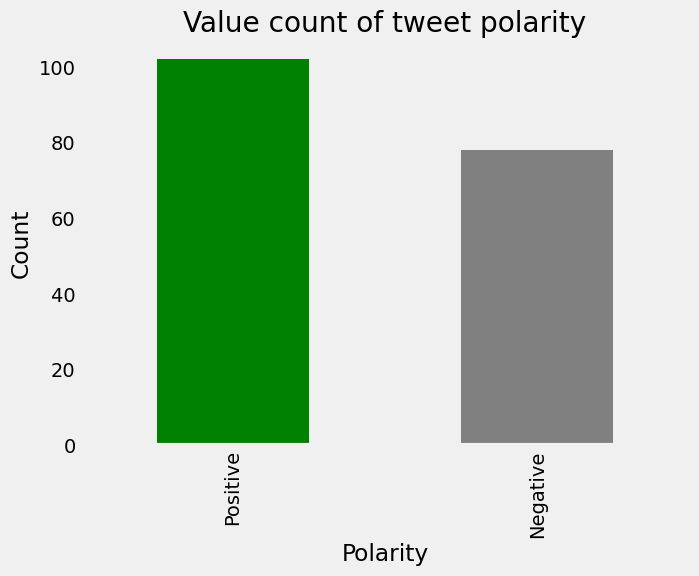

In [112]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
v.value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

In [739]:
df.head()

Date                                              Tweet Stock Name  \
0 2022-09-29  Mainstream media has done an amazing job at br...       TSLA   
1 2022-09-29  Tesla delivery estimates are at around 364k fr...       TSLA   
2 2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3 2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4 2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   

  Company Name  
0  Tesla, Inc.  
1  Tesla, Inc.  
2  Tesla, Inc.  
3  Tesla, Inc.  
4  Tesla, Inc.

# Technical indicators + merge all datasets
bron: https://github.com/tejaslinge/Stock-Price-Prediction-using-LSTM-and-Technical-Indicators/blob/main/Price%20Prediction%20using%20LSTM%20and%20TA.ipynb

https://github.com/hlinh88/LSTM-Sentiment-Analysis/blob/main/LSTM.ipynb

In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [436]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma10'] = dataset['Price'].rolling(window=10).mean()
    dataset['ma20'] = dataset['Price'].rolling(window=20).mean()
    dataset['ma50'] = dataset['Price'].rolling(window=50).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Price'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Price'].ewm(span=12).mean()
    dataset['MACD'] = dataset['12ema']-dataset['26ema']

    # Create Bollinger Bands
    dataset['50sd'] = dataset['Price'].rolling(window = 50).std()
    dataset['upper_band'] = dataset['ma50'] + (dataset['50sd']*2)
    dataset['lower_band'] = dataset['ma50'] - (dataset['50sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Price']-1
    dataset['log_momentum'] = np.log(dataset['momentum'])
    return dataset

In [478]:
data = pd.DataFrame({'Date': df_complete['Date'], 'Price': df_complete['Close']})
data.head()

Date       Price
0 2022-09-29  368.739990
1 2022-09-28  343.853333
2 2022-09-27  349.869995
3 2022-09-26  343.503326
4 2022-09-23  331.883331

In [479]:
# find max value using loop
w = data['Price']
max_val = w[0]
for val in w:
    if val < max_val:
        max_val = val
# display the max value
print(max_val)

209.386673


In [480]:
print('There are {} number of days in the dataset.'.format(data.shape[0]))

There are 180 number of days in the dataset.


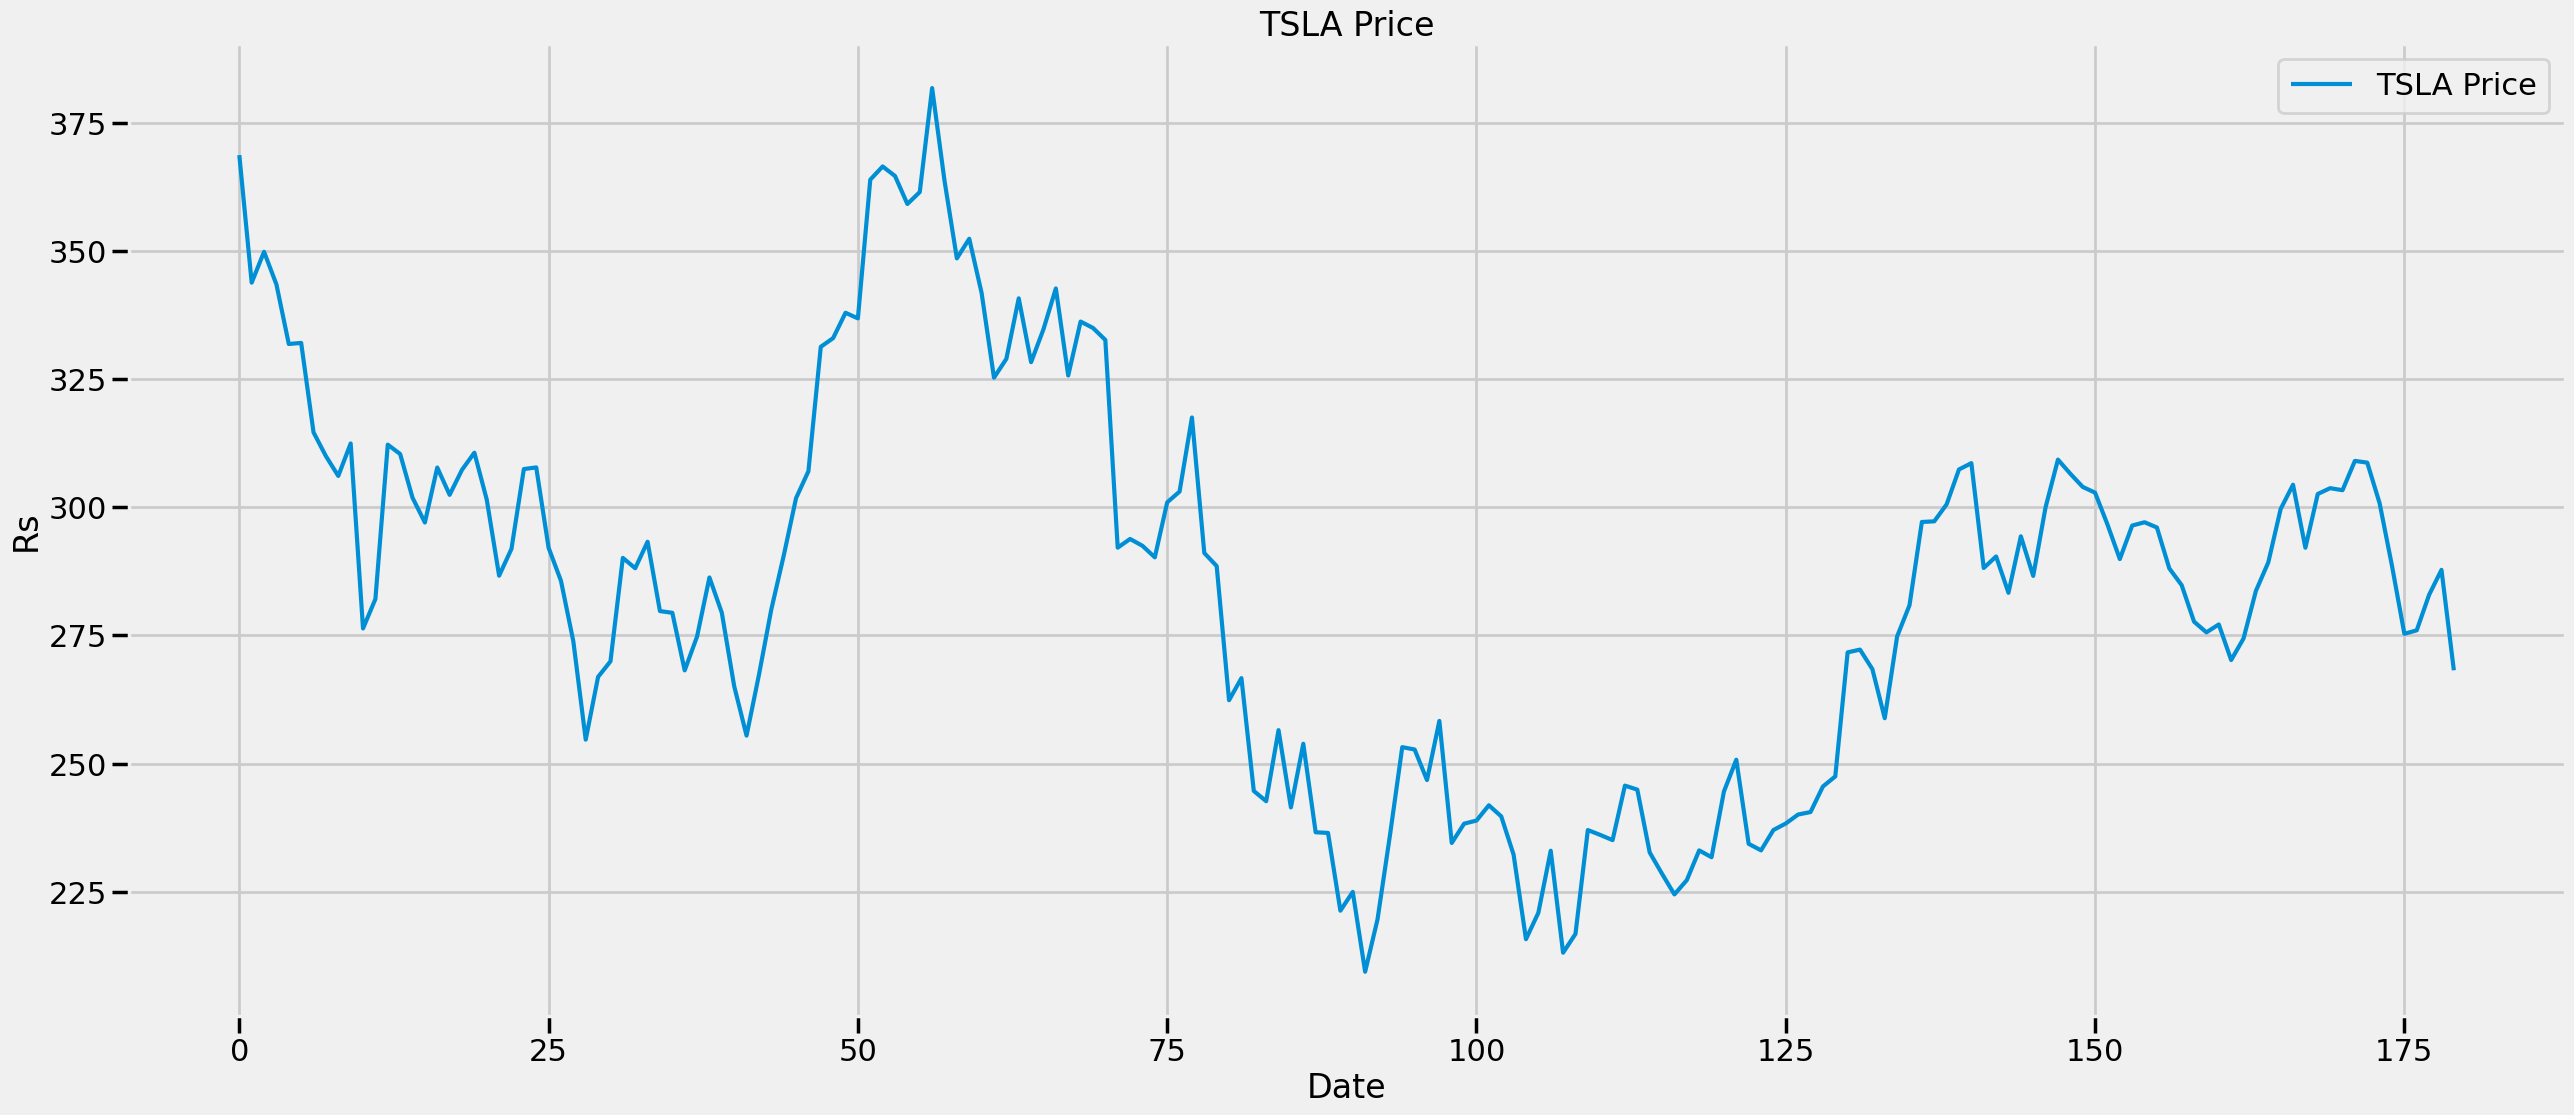

In [481]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(data.index, data['Price'], label='TSLA Price')
plt.xlabel('Date')
plt.ylabel('Rs')
plt.title('TSLA Price')
plt.legend()
plt.show()

In [492]:
def get_technical_indicators(dataset):
    # Create MACD
    dataset['26ema'] = dataset['Price'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Price'].ewm(span=12).mean()
    dataset['MACD'] = dataset['12ema']-dataset['26ema']

    # Create Exponential moving average
    dataset['ma50'] = dataset['Price'].rolling(window=50).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Price']-1
    dataset['log_momentum'] = np.log(dataset['momentum'])
    return dataset

In [493]:
d = get_technical_indicators(data)

In [494]:
d.isnull().values.any()

True

In [505]:
dataset = d.dropna()
dataset.head()

Date       Price       26ema       12ema       MACD    momentum  \
49 2022-07-21  337.973328  295.735051  304.550810   8.815760  336.973328   
50 2022-07-20  336.880005  298.844206  309.525525  10.681319  335.880005   
51 2022-07-19  363.946655  303.756402  317.899420  14.143018  362.946655   
52 2022-07-18  366.523346  308.485853  325.381093  16.895239  365.523346   
53 2022-07-15  364.663330  312.713401  331.425244  18.711843  363.663330   

    log_momentum        ma50  
49      5.820004  299.383997  
50      5.816754  298.746797  
51      5.894256  299.148664  
52      5.901330  299.481731  
53      5.896229  299.904931

In [757]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 49 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   Price         131 non-null    float64       
 2   26ema         131 non-null    float64       
 3   12ema         131 non-null    float64       
 4   MACD          131 non-null    float64       
 5   momentum      131 non-null    float64       
 6   log_momentum  131 non-null    float64       
 7   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 9.2 KB


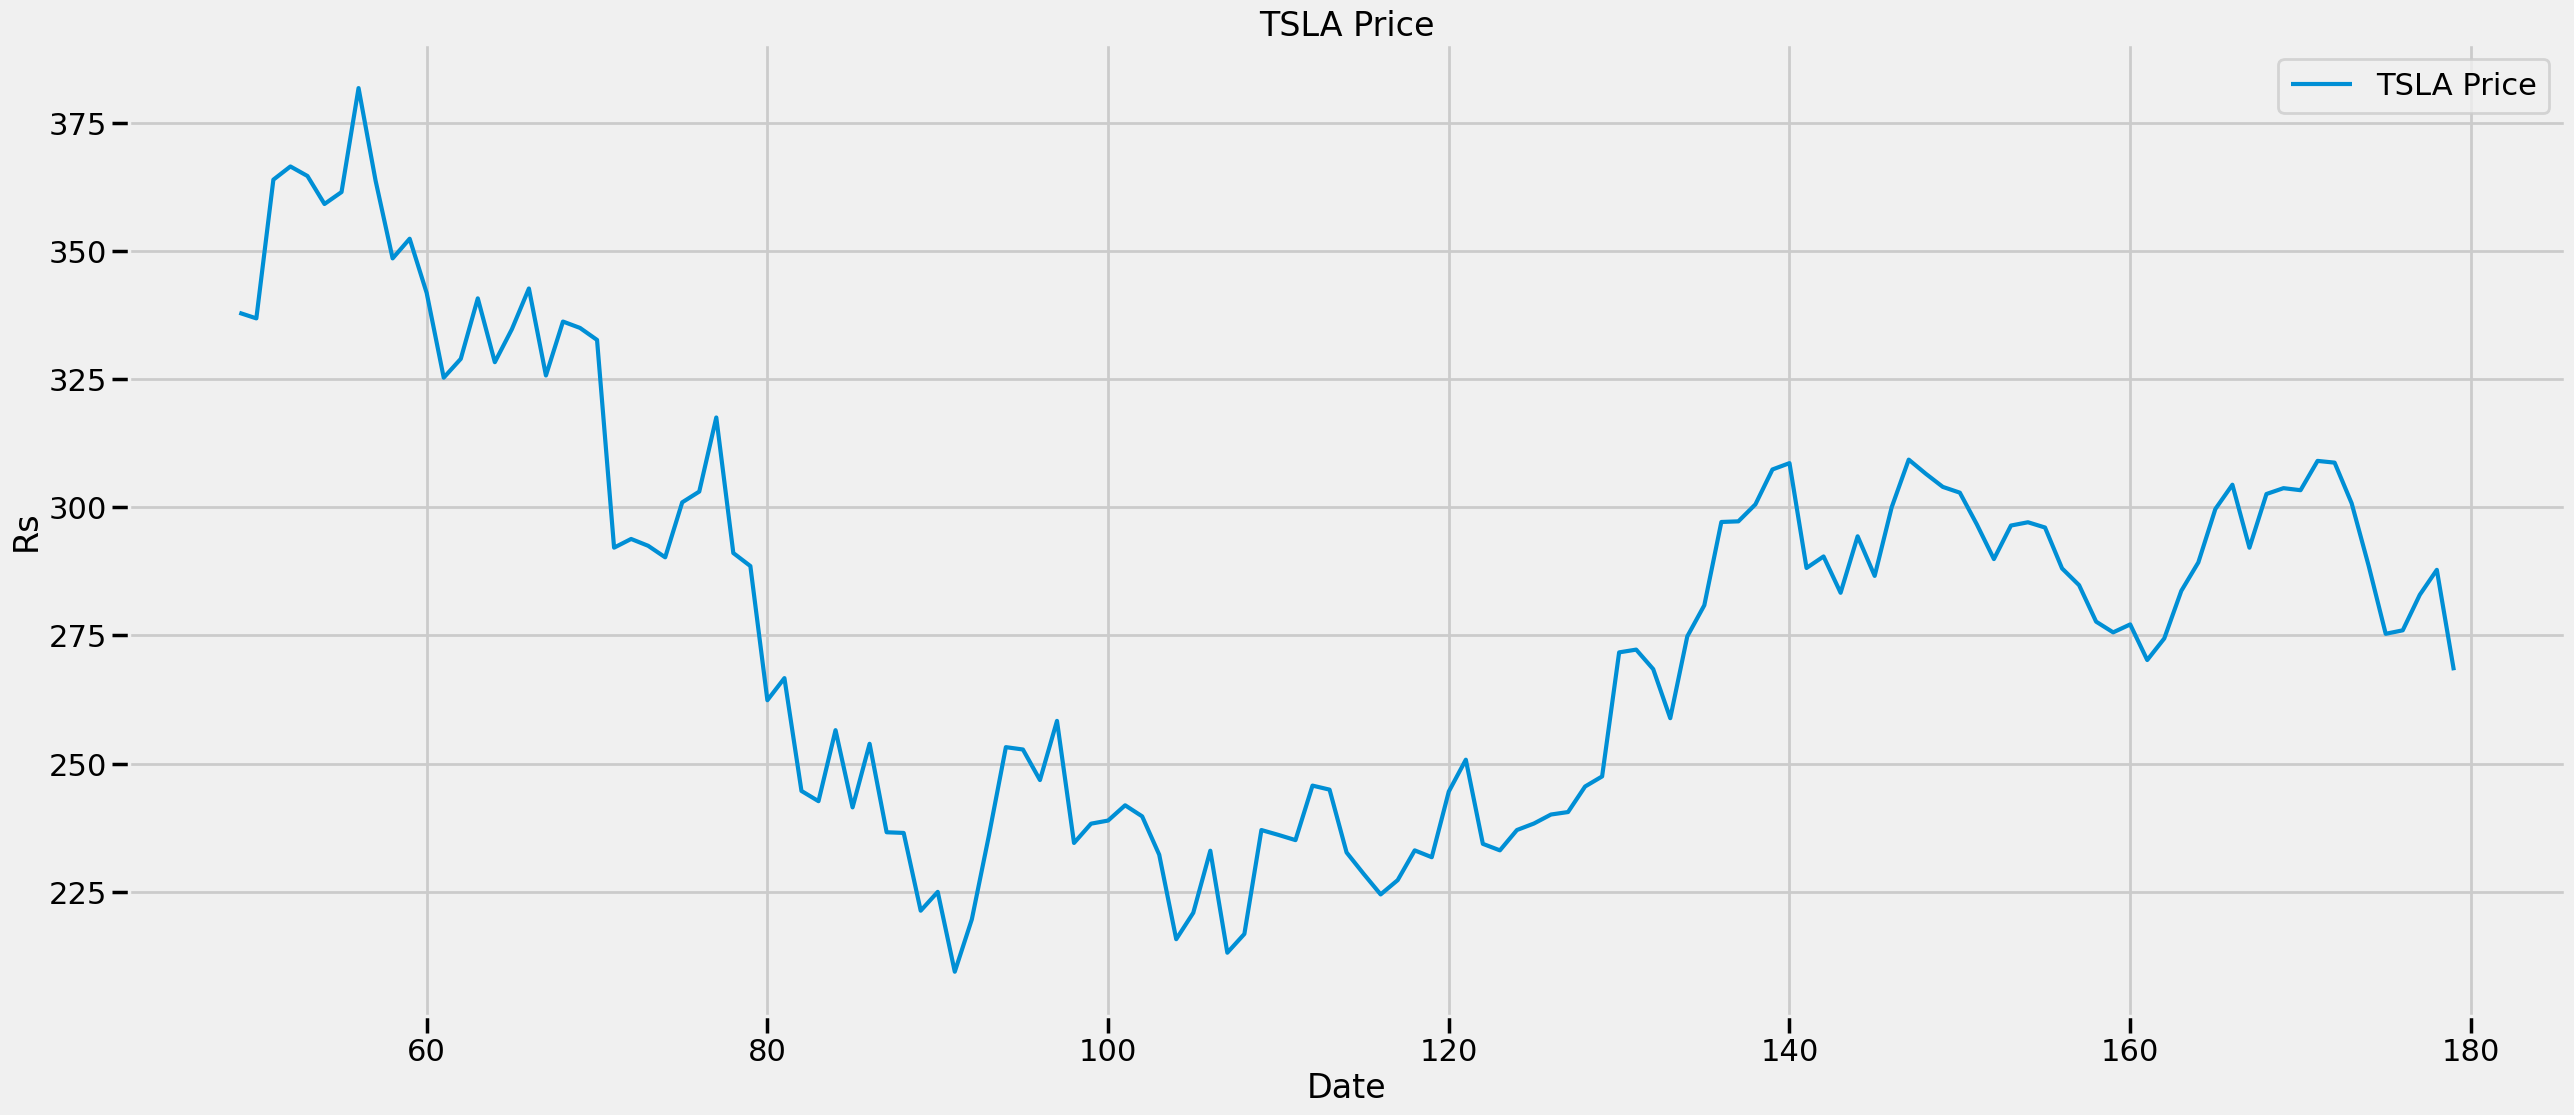

In [758]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(dataset.index, dataset['Price'], label='TSLA Price')
plt.xlabel('Date')
plt.ylabel('Rs')
plt.title('TSLA Price')
plt.legend()
plt.show()

In [508]:
import copy
datasetje1 = copy.deepcopy(dataset)
datasetje1.info()
# dropping passed columns
datasetje1.drop(["26ema", '12ema', 'momentum','log_momentum'], axis = 1, inplace = True)
datasetje1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 49 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   Price         131 non-null    float64       
 2   26ema         131 non-null    float64       
 3   12ema         131 non-null    float64       
 4   MACD          131 non-null    float64       
 5   momentum      131 non-null    float64       
 6   log_momentum  131 non-null    float64       
 7   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 9.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 49 to 179
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    131 non-null    datetime64[ns]
 1   Price   131 non-null    float64       
 2   MACD    131 non-null    float64       
 3   ma50  

In [509]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(160, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(30,20))
        # Plot second subplot

    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(datasetje1['MACD'],label='MACD', linestyle='-.')
    plt.plot(datasetje1['ma50'],label='ma50', linestyle='--')
    plt.plot(datasetje1['Price'],label='Closing Price', linestyle=':')
#     plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    #plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<Figure size 16000x1000 with 0 Axes>

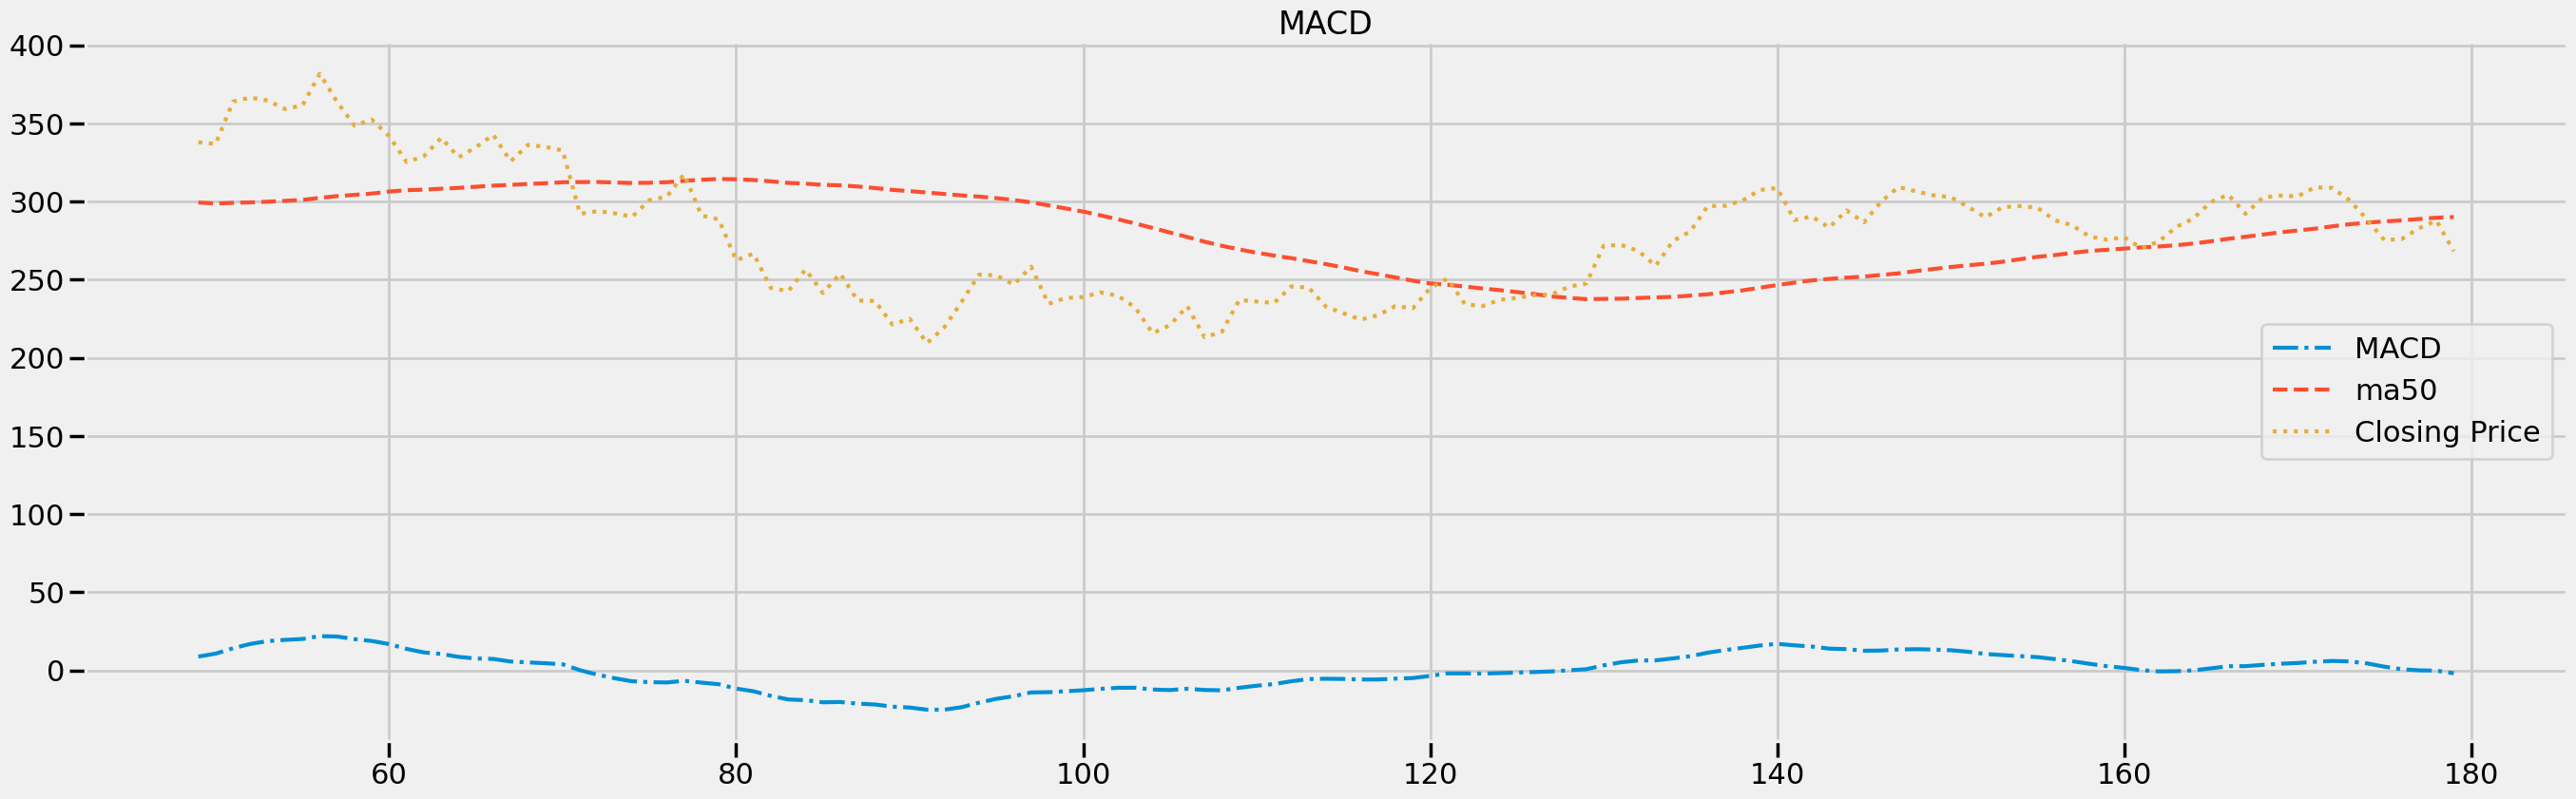

In [510]:
plot_technical_indicators(datasetje1, 1000)

Text(0.5, 1.0, 'Params')

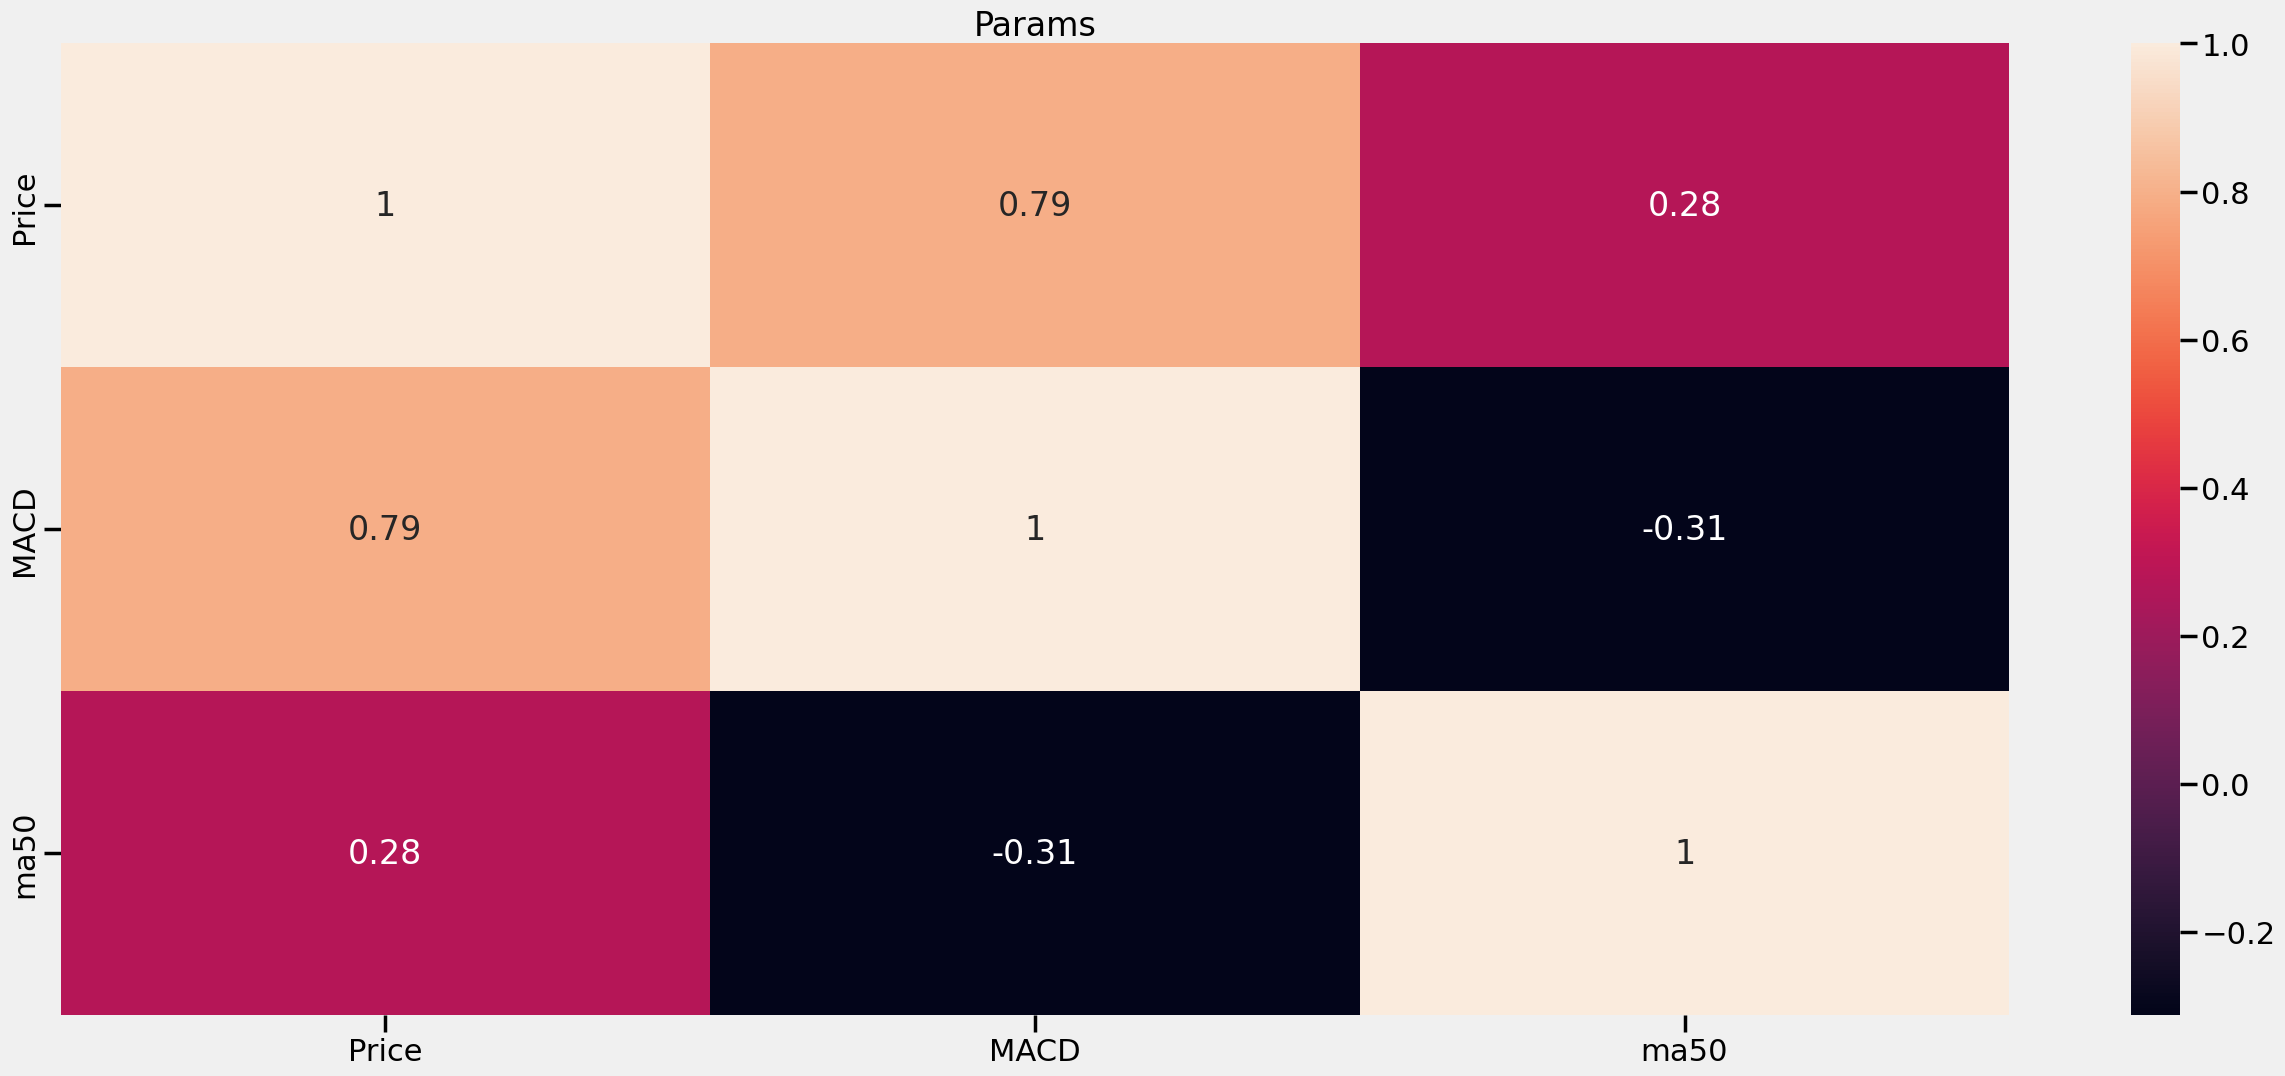

In [512]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(datasetje1.corr(), annot = True).set_title('Params')

In [513]:
print('Total dataset has {} samples, and {} features.'.format(dataset.shape[0], \
                                                              dataset.shape[1]))

Total dataset has 131 samples, and 8 features.


In [514]:
datasetcompleet = df_complete.merge(dataset, on='Date')
datasetcompleet.head()

Date  polaritymean        Open        High         Low       Close  \
0 2022-07-21      0.115474  336.576660  341.496674  329.600006  337.973328   
1 2022-07-20     -0.096564  336.000000  340.600006  332.440002  336.880005   
2 2022-07-19     -0.093049  355.033325  365.959991  351.200012  363.946655   
3 2022-07-18      0.127393  369.329987  371.589996  357.703339  366.523346   
4 2022-07-15      0.103682  363.723328  371.316681  361.333344  364.663330   

    Adj Close     Volume       Price       26ema       12ema       MACD  \
0  337.973328   68920800  337.973328  295.735051  304.550810   8.815760   
1  336.880005   62031600  336.880005  298.844206  309.525525  10.681319   
2  363.946655  102506100  363.946655  303.756402  317.899420  14.143018   
3  366.523346   73614900  366.523346  308.485853  325.381093  16.895239   
4  364.663330   59865000  364.663330  312.713401  331.425244  18.711843   

     momentum  log_momentum        ma50  
0  336.973328      5.820004  299.383997  
1  335.880005      5.816754  298.746797  
2  362.946655      5.894256  299.148664  
3  365.523346      5.901330  299.481731  
4  363.663330      5.896229  299.904931

In [515]:
# Remove two columns as index base
datasetcompleet.drop(datasetcompleet.columns[[2,3,4,5,6,7]], axis = 1, inplace = True)

In [516]:
datasetcompleet.tail()

Date  polaritymean       Price       26ema       12ema      MACD  \
126 2022-01-19     -0.067599  275.329987  291.824009  294.150896  2.326887   
127 2022-01-18     -0.085428  276.010010  290.652600  291.359990  0.707390   
128 2022-01-14      0.101945  282.940002  290.081296  290.064607 -0.016688   
129 2022-01-13     -0.055295  287.809998  289.913051  289.717744 -0.195307   
130 2022-01-12     -0.097400  268.209991  288.305416  286.408859 -1.896557   

       momentum  log_momentum        ma50  
126  274.329987      5.614332  287.259467  
127  275.010010      5.616807  287.978334  
128  281.940002      5.641694  288.826201  
129  286.809998      5.658820  289.671801  
130  267.209991      5.588035  290.086001

In [517]:
datasetcompleet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
 3   26ema         131 non-null    float64       
 4   12ema         131 non-null    float64       
 5   MACD          131 non-null    float64       
 6   momentum      131 non-null    float64       
 7   log_momentum  131 non-null    float64       
 8   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.2 KB


In [518]:
print('Total dataset has {} samples, and {} features.'.format(datasetcompleet.shape[0], \
                                                              datasetcompleet.shape[1]))

Total dataset has 131 samples, and 9 features.


# ARIMA
- https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/
- https://www.kaggle.com/code/taniaj/cryptocurrency-predictions-with-arima
- https://www.tobiolabode.com/blog/2020/12/30/how-to-convert-non-stationary-data-into-stationary-for-arima-model-with-python

In [519]:
#Libraries
import warnings
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [520]:
import copy
b = copy.deepcopy(datasetcompleet)
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
 3   26ema         131 non-null    float64       
 4   12ema         131 non-null    float64       
 5   MACD          131 non-null    float64       
 6   momentum      131 non-null    float64       
 7   log_momentum  131 non-null    float64       
 8   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.2 KB


In [745]:
b.head()

Date  polaritymean       Price       26ema       12ema       MACD  \
0 2022-07-21      0.115474  337.973328  295.735051  304.550810   8.815760   
1 2022-07-20     -0.096564  336.880005  298.844206  309.525525  10.681319   
2 2022-07-19     -0.093049  363.946655  303.756402  317.899420  14.143018   
3 2022-07-18      0.127393  366.523346  308.485853  325.381093  16.895239   
4 2022-07-15      0.103682  364.663330  312.713401  331.425244  18.711843   

     momentum  log_momentum        ma50  
0  336.973328      5.820004  299.383997  
1  335.880005      5.816754  298.746797  
2  362.946655      5.894256  299.148664  
3  365.523346      5.901330  299.481731  
4  363.663330      5.896229  299.904931

In [521]:
import copy
c = copy.deepcopy(datasetcompleet)
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
 3   26ema         131 non-null    float64       
 4   12ema         131 non-null    float64       
 5   MACD          131 non-null    float64       
 6   momentum      131 non-null    float64       
 7   log_momentum  131 non-null    float64       
 8   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.2 KB


In [746]:
b.tail()

Date  polaritymean       Price       26ema       12ema      MACD  \
126 2022-01-19     -0.067599  275.329987  291.824009  294.150896  2.326887   
127 2022-01-18     -0.085428  276.010010  290.652600  291.359990  0.707390   
128 2022-01-14      0.101945  282.940002  290.081296  290.064607 -0.016688   
129 2022-01-13     -0.055295  287.809998  289.913051  289.717744 -0.195307   
130 2022-01-12     -0.097400  268.209991  288.305416  286.408859 -1.896557   

       momentum  log_momentum        ma50  
126  274.329987      5.614332  287.259467  
127  275.010010      5.616807  287.978334  
128  281.940002      5.641694  288.826201  
129  286.809998      5.658820  289.671801  
130  267.209991      5.588035  290.086001

# New arima 1 feature

In [743]:
import copy
eendata = copy.deepcopy(datasetcompleet)
eendata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
 3   26ema         131 non-null    float64       
 4   12ema         131 non-null    float64       
 5   MACD          131 non-null    float64       
 6   momentum      131 non-null    float64       
 7   log_momentum  131 non-null    float64       
 8   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.2 KB


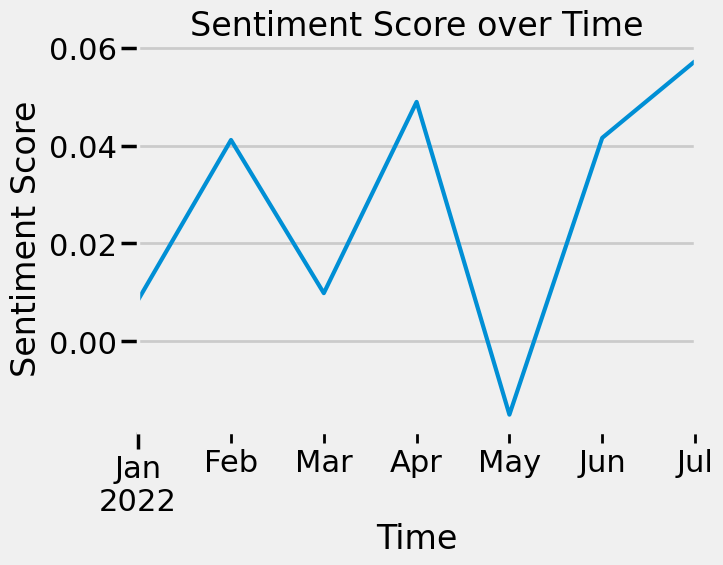

In [744]:
eendata.groupby(eendata['Date'].dt.to_period("M"))['polaritymean'].mean().plot()
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score over Time')
plt.show()

In [523]:
# dropping passed columns
eendata.drop(['polaritymean',"26ema", '12ema', 'momentum','MACD','log_momentum','ma50'], axis = 1, inplace = True)
eendata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    131 non-null    datetime64[ns]
 1   Price   131 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


In [524]:
import plotly.express as px

fig = px.line(eendata, x='Date', y='Price', title='Price')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

In [525]:
el_df=eendata.set_index('Date')

array([<AxesSubplot:xlabel='Date'>], dtype=object)

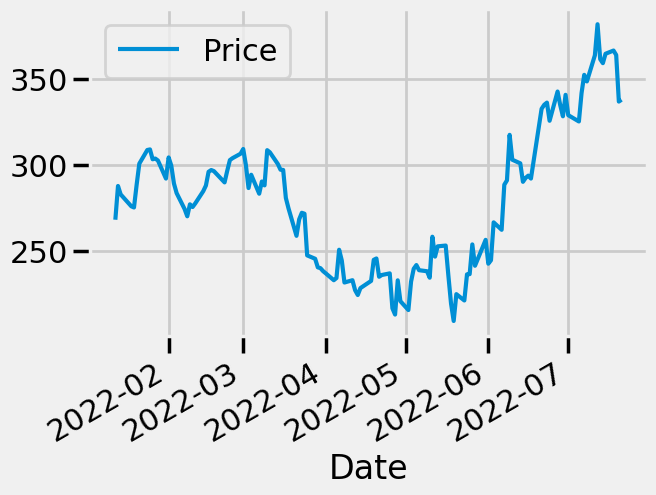

In [526]:
el_df.plot(subplots=True)

In [527]:
print ("\nMissing values :  ", eendata.isnull().any())


Missing values :   Date     False
Price    False
dtype: bool


In [528]:
import pmdarima as pm
model = pm.auto_arima(eendata['Price'], 
                        m=5, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=993.407, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=996.501, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=994.883, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=994.045, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=994.809, Time=0.08 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=993.525, Time=0.10 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=994.893, Time=0.16 sec
 ARIMA(0,1,0)(2,0,1)[5] intercept   : AIC=995.193, Time=0.37 sec
 ARIMA(0,1,0)(1,0,2)[5] intercept   : AIC=995.260, Time=0.43 sec
 ARIMA(0,1,0)(0,0,2)[5] intercept   : AIC=993.400, Time=0.18 sec
 ARIMA(1,1,0)(0,0,2)[5] intercept   : AIC=994.795, Time=0.29 sec
 ARIMA(0,1,1)(0,0,2)[5] intercept   : AIC=994.848, Time=0.37 sec
 ARIMA(1,1,1)(0,0,2)[5] intercept   : AIC=996.506, Time=0.40 sec
 ARIMA(0,1,0)(0,0,2)[5]             : AIC=992.088, Time=0.11 sec
 ARIMA(0,1,0)(0,0,1)[5]             : AIC=992.0

In [532]:
n_train_hours1 = 92

train = eendata[:n_train_hours1]
test = eendata[n_train_hours1::]

In [533]:
model.fit(train['Price'])

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 1, 5),
      suppress_warnings=True, with_intercept=False)

In [534]:
print(len(test))

39


In [535]:
forecast=model.predict(n_periods=len(test), return_conf_int=True)

In [536]:
forecast

(92     305.039907
 93     305.222801
 94     304.904592
 95     302.637903
 96     301.822054
 97     301.822054
 98     301.822054
 99     301.822054
 100    301.822054
 101    301.822054
 102    301.822054
 103    301.822054
 104    301.822054
 105    301.822054
 106    301.822054
 107    301.822054
 108    301.822054
 109    301.822054
 110    301.822054
 111    301.822054
 112    301.822054
 113    301.822054
 114    301.822054
 115    301.822054
 116    301.822054
 117    301.822054
 118    301.822054
 119    301.822054
 120    301.822054
 121    301.822054
 122    301.822054
 123    301.822054
 124    301.822054
 125    301.822054
 126    301.822054
 127    301.822054
 128    301.822054
 129    301.822054
 130    301.822054
 dtype: float64,
 array([[281.89661404, 328.18320018],
        [272.49324164, 337.95235953],
        [264.81923274, 344.98995166],
        [256.35131708, 348.92448937],
        [250.07207795, 353.57203102],
        [246.99645258, 356.6476564 ],
        [244.0

In [537]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])
forecast_df

Prediction
92   305.039907
93   305.222801
94   304.904592
95   302.637903
96   301.822054
97   301.822054
98   301.822054
99   301.822054
100  301.822054
101  301.822054
102  301.822054
103  301.822054
104  301.822054
105  301.822054
106  301.822054
107  301.822054
108  301.822054
109  301.822054
110  301.822054
111  301.822054
112  301.822054
113  301.822054
114  301.822054
115  301.822054
116  301.822054
117  301.822054
118  301.822054
119  301.822054
120  301.822054
121  301.822054
122  301.822054
123  301.822054
124  301.822054
125  301.822054
126  301.822054
127  301.822054
128  301.822054
129  301.822054
130  301.822054

In [538]:
print(forecast_df.shape)

(39, 1)


<AxesSubplot:>

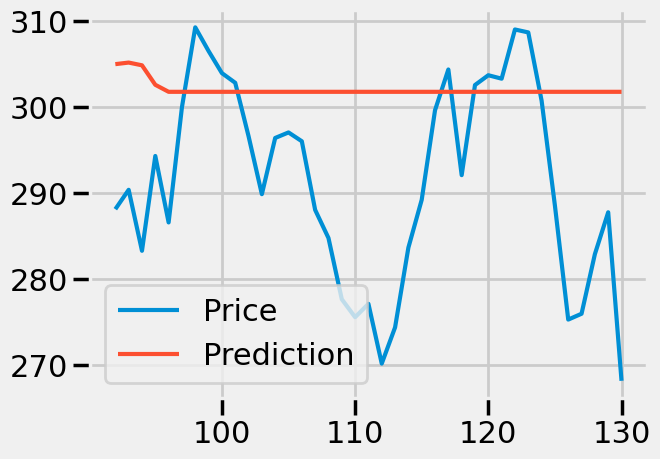

In [539]:
import matplotlib.pyplot as plt
pd.concat([test['Price'],forecast_df],axis=1).plot()

In [540]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape
  
# Calculate mean squared error
print('MSE:',mean_squared_error(test["Price"], forecast_df))

print('MAE:',mean_absolute_error(test['Price'], forecast_df))

print('MAPE:', mape(test['Price'], forecast_df))

#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
print('RMSE:',sqrt(mean_squared_error(test['Price'], forecast_df)) )

MSE: 247.15273845650583
MAE: 12.518017189786482
MAPE: 0.04391077452627614
RMSE: 15.72109215215361


# New arima 2 features

In [541]:
import copy
arima2 = copy.deepcopy(datasetcompleet)
arima2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
 3   26ema         131 non-null    float64       
 4   12ema         131 non-null    float64       
 5   MACD          131 non-null    float64       
 6   momentum      131 non-null    float64       
 7   log_momentum  131 non-null    float64       
 8   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.2 KB


In [542]:
# dropping passed columns
arima2.drop([ "26ema", '12ema', 'momentum', 'log_momentum', 'ma50', 'MACD'], axis = 1, inplace = True)
arima2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.1 KB


In [545]:
n_train_hours1 = 92

train = arima2[:n_train_hours1]
test = arima2[n_train_hours1::]
train

Date  polaritymean       Price
0  2022-07-21      0.115474  337.973328
1  2022-07-20     -0.096564  336.880005
2  2022-07-19     -0.093049  363.946655
3  2022-07-18      0.127393  366.523346
4  2022-07-15      0.103682  364.663330
..        ...           ...         ...
87 2022-03-16      0.125301  297.149994
88 2022-03-15     -0.075963  297.276672
89 2022-03-14     -0.077689  300.586670
90 2022-03-11     -0.077981  307.396667
91 2022-03-10     -0.041372  308.633331

[92 rows x 3 columns]

In [551]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

exo = train[['polaritymean', 'Price']]

# Fit the SARIMAX model using pm.auto_arima()
model = pm.auto_arima(train['Price'], exogenous=exo,
                      start_p=1, start_q=1,
                      max_p=3, max_q=3, m=5,
                      start_P=0, seasonal=True,
                      d=None, D=1, trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[5]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=746.828, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=715.486, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=748.035, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=709.352, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=695.270, Time=0.54 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=693.587, Time=0.30 sec
 ARIMA(1,1,0)(0,1,1)[5]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(1,1,2)[5]             : AIC=694.427, Time=0.19 sec
 ARIMA(1,1,0)(0,1,2)[5]             : AIC=693.243, Time=0.19 sec
 ARIMA(0,1,0)(0,1,2)[5]             : AIC=inf, Time=0.15 sec
 ARIMA(2,1,0)(0,1,2)[5]             : AIC=694.815, Time=0.18 sec
 ARIMA(1,1,1)(0,1,2)[5]             : AIC=694.869, Time=0.17 sec
 ARIMA(0,1,1)(0,1,2)[5]             : AIC=693.506, Time=0.16 se

<function matplotlib.pyplot.show(close=None, block=None)>

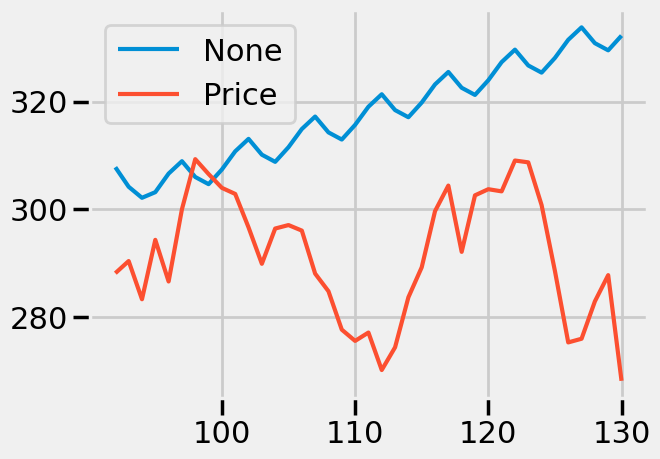

In [552]:
# Make predictions
predictions = model.predict(n_periods=len(test), exogenous=test['Price'])
predictions

# plot predictions and actual values
predictions.plot(legend = True)
test['Price'].plot(legend = True)
plt.show

In [553]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape
  
# Calculate mean squared error
print('MSE:',mean_squared_error(test["Price"], predictions))

print('MAE:',mean_absolute_error(test['Price'], predictions))

print('MAPE:', mape(test['Price'], predictions))

#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
print('RMSE:',sqrt(mean_squared_error(test['Price'], predictions)) )

MSE: 940.4769864050302
MAE: 26.45451613889929
MAPE: 0.09267569629728539
RMSE: 30.667197237521236


# New arima 3 features
https://www.section.io/engineering-education/multivariate-time-series-using-auto-arima/

In [748]:
import copy
c = copy.deepcopy(datasetcompleet)
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
 3   26ema         131 non-null    float64       
 4   12ema         131 non-null    float64       
 5   MACD          131 non-null    float64       
 6   momentum      131 non-null    float64       
 7   log_momentum  131 non-null    float64       
 8   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.2 KB


In [749]:
# dropping passed columns
c.drop([ "26ema", '12ema', 'momentum', 'log_momentum'], axis = 1, inplace = True)
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
 3   MACD          131 non-null    float64       
 4   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 6.1 KB


In [750]:
import plotly.express as px

fig = px.line(c, x='Date', y='Price', title='Price')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

In [751]:
el_df=c.set_index('Date')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

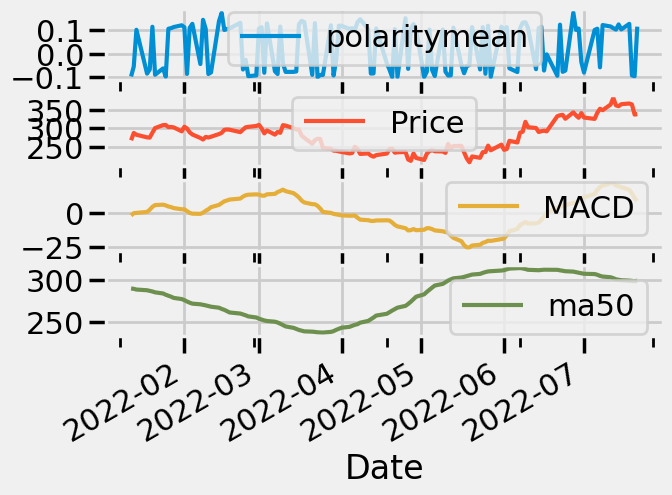

In [752]:
el_df.plot(subplots=True)

In [753]:
n_train_hours1 = 92

train = c[:n_train_hours1]
test = c[n_train_hours1::]

In [754]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

exo = train[['polaritymean', 'Price', 'ma50', 'MACD']]

# Fit the SARIMAX model using pm.auto_arima()
model = pm.auto_arima(train['Price'], exogenous=exo,
                      start_p=1, start_q=1,
                      max_p=3, max_q=3, m=5,
                      start_P=0, seasonal=True,
                      d=None, D=1, trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[5]             : AIC=inf, Time=1.05 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=746.828, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=715.486, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=748.035, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=709.352, Time=0.29 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=695.270, Time=1.38 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=693.587, Time=0.56 sec
 ARIMA(1,1,0)(0,1,1)[5]             : AIC=inf, Time=0.46 sec
 ARIMA(1,1,0)(1,1,2)[5]             : AIC=694.427, Time=0.44 sec
 ARIMA(1,1,0)(0,1,2)[5]             : AIC=693.243, Time=0.29 sec
 ARIMA(0,1,0)(0,1,2)[5]             : AIC=inf, Time=0.25 sec
 ARIMA(2,1,0)(0,1,2)[5]             : AIC=694.815, Time=0.47 sec
 ARIMA(1,1,1)(0,1,2)[5]             : AIC=694.869, Time=0.39 sec
 ARIMA(0,1,1)(0,1,2)[5]             : AIC=693.506, Time=0.27 se

<function matplotlib.pyplot.show(close=None, block=None)>

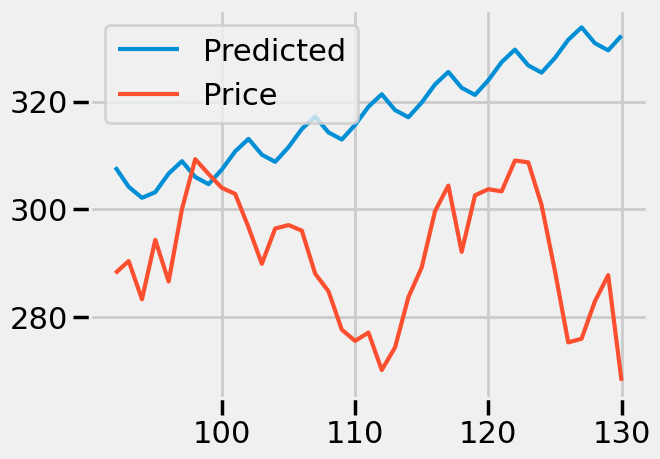

In [756]:
# Make predictions
predictions = model.predict(n_periods=len(test), exogenous=test['Price'])
predictions

# plot predictions and actual values
predictions.plot(legend = True, label = 'Predicted')
test['Price'].plot(legend = True)
plt.show

In [567]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape
  
# Calculate mean squared error
print('MSE:',mean_squared_error(test["Price"], predictions))

print('MAE:',mean_absolute_error(test['Price'], predictions))

print('MAPE:', mape(test['Price'], predictions))

#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
print('RMSE:',sqrt(mean_squared_error(test['Price'], predictions)) )

MSE: 940.4769864050302
MAE: 26.45451613889929
MAPE: 0.09267569629728539
RMSE: 30.667197237521236


# LSTM1

In [721]:
from matplotlib import pyplot
from keras.layers import LSTM, GRU


# In[1121]:


datasetcompleet.head()


# In[1122]:


import copy
a = copy.deepcopy(datasetcompleet)
a.info()


# In[1123]:


# dropping passed columns
a.drop(["momentum", "log_momentum"], axis = 1, inplace = True)


# In[1124]:


a


# In[1125]:


del a["Date"]


# In[1126]:


a


# In[1127]:


# Scaling the entire dataset

dataset1 = a
values1 = dataset1.values

values1 = values1.astype('float32')

scaler1 = MinMaxScaler()
scaled = scaler1.fit_transform(values1)


# In[1128]:


scaled.shape


# In[1129]:


def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg


# In[1130]:


# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)


# In[1131]:


print(reframed.head())


# In[1132]:


reframed.columns


# In[1133]:


a.info()


# In[1134]:


# droping columns we don't want to predict

reframed.drop(reframed.columns[[0,2,3,4,5,6,8,9,10,11]], axis=1, inplace=True)
print(reframed.head())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
 3   26ema         131 non-null    float64       
 4   12ema         131 non-null    float64       
 5   MACD          131 non-null    float64       
 6   momentum      131 non-null    float64       
 7   log_momentum  131 non-null    float64       
 8   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.2 KB
(130, 12)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.782629   0.745732   0.615873   0.628674   0.722503   0.804468  0.013458   
2   0.013458   0.739392   0.648388   0.669884   0.762127   0.796180  0.026208   
3   0.026208   0.896363   0.69976

(92, 1, 1) (92,) (38, 1, 1) (38,)
Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 0.2153 - val_loss: 0.2232
Epoch 2/300
1/1 [==============================] - 0s 71ms/step - loss: 0.2079 - val_loss: 0.2146
Epoch 3/300
1/1 [==============================] - 0s 74ms/step - loss: 0.2007 - val_loss: 0.2062
Epoch 4/300
1/1 [==============================] - 0s 60ms/step - loss: 0.1936 - val_loss: 0.1980
Epoch 5/300
1/1 [==============================] - 0s 62ms/step - loss: 0.1867 - val_loss: 0.1899
Epoch 6/300
1/1 [==============================] - 0s 79ms/step - loss: 0.1799 - val_loss: 0.1820
Epoch 7/300
1/1 [==============================] - 0s 60ms/step - loss: 0.1732 - val_loss: 0.1742
Epoch 8/300
1/1 [==============================] - 0s 67ms/step - loss: 0.1667 - val_loss: 0.1666
Epoch 9/300
1/1 [==============================] - 0s 67ms/step - loss: 0.1604 - val_loss: 0.1591
Epoch 10/300
1/1 [==============================] - 0s 68ms/step - loss: 0.1541 - val_

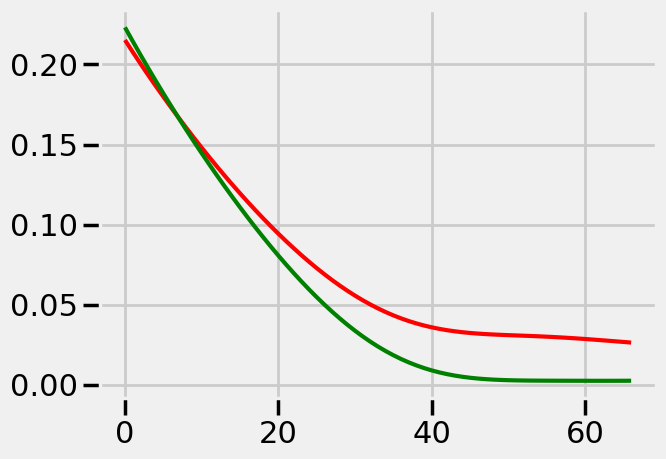

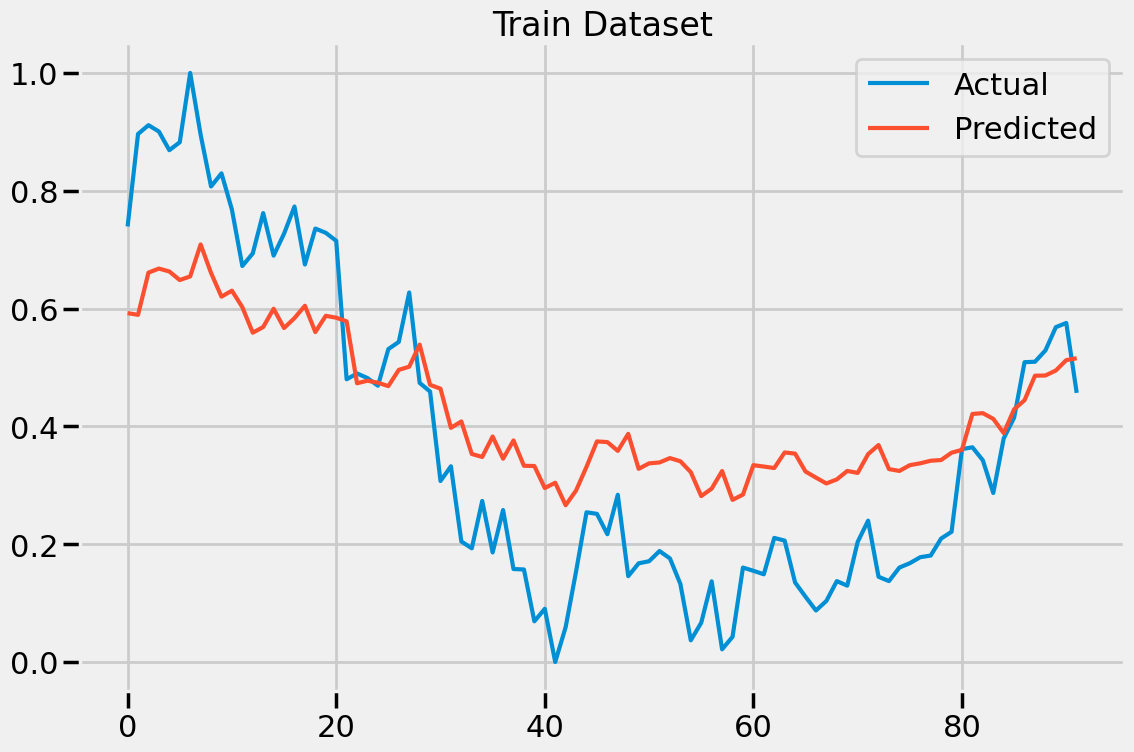

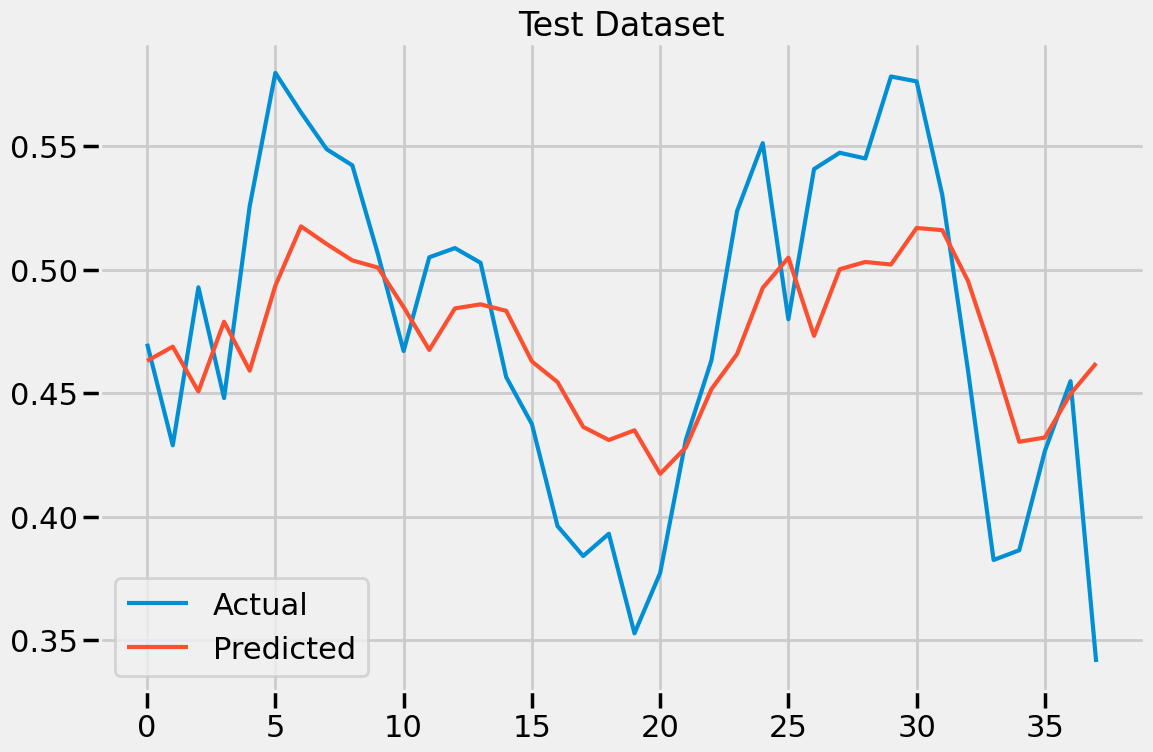

In [722]:

# In[1135]:


values = reframed.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 92

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

from sklearn.utils import class_weight
sample_weights = class_weight.compute_sample_weight('balanced', train)

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


# In[1136]:


values


# In[1138]:


#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(1,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
 
#Fit model with history to check for overfitting
history = model.fit(train_X,train_y,epochs=300,batch_size=92,callbacks=[callback],validation_data=(test_X,test_y),shuffle=False)
 
model.summary() 


# In[833]:


pyplot.plot(history.history['loss'], label='LSTM train', color='red')
pyplot.plot(history.history['val_loss'], label='LSTM test', color= 'green')


# In[1085]:


scaler1.scale_


# In[1139]:


plt.figure(figsize=(12,8))
y_pred_train = model.predict(train_X)
plt.plot(train_y, label="Actual")
plt.plot(y_pred_train, label="Predicted")
plt.legend()
plt.title("Train Dataset")


# In[1140]:


plt.figure(figsize=(12,8))
y_pred_test = model.predict(test_X)
plt.plot(test_y, label="Actual")
plt.plot(y_pred_test, label="Predicted")
plt.legend()
plt.title("Test Dataset")


# In[1088]:


print('y test:', test_y.shape)
print('y_pred_test :', y_pred_test.shape)
print('y train :', train_y.shape)
print('y_pred_train:', y_pred_train.shape)


# # Evaluate GRU

# In[1141]:


# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
  
# Calculate mean squared error
print('MSE:',mean_squared_error(test_y, y_pred_test))

print('MAE:',mean_absolute_error(test_y, y_pred_test))

print('MAPE:', mape(test_y, y_pred_test))

print('RMSE:',sqrt(mean_squared_error(test_y, y_pred_test)) )


# In[1111]:


from sklearn.metrics import r2_score

2/2 [==============================] - 0s 14ms/step


Text(0.5, 1.0, 'Test Dataset')

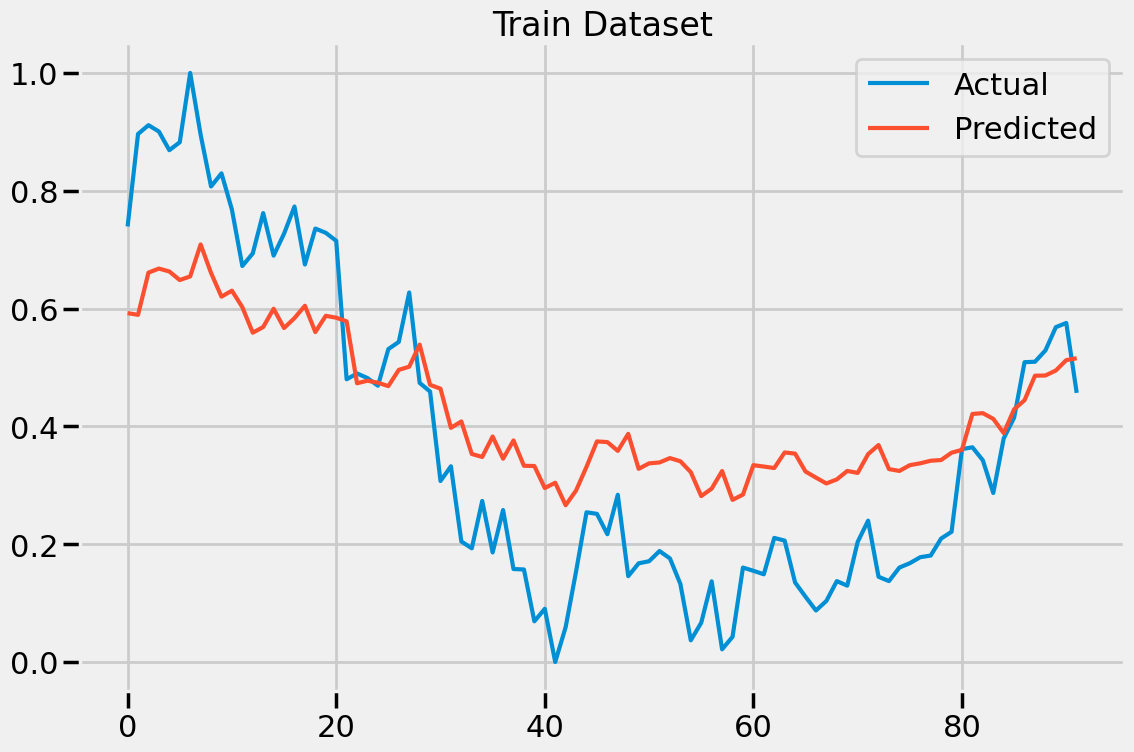

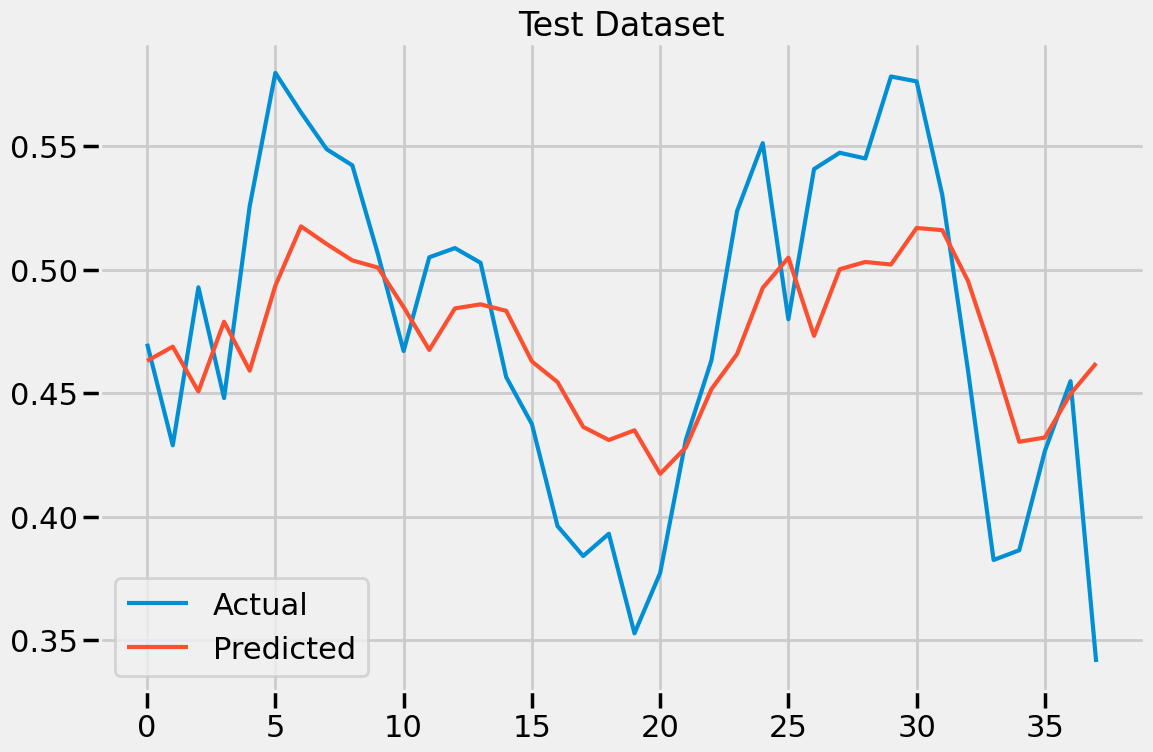

In [723]:

plt.figure(figsize=(12,8))
y_pred_train = model.predict(train_X)
plt.plot(train_y, label="Actual")
plt.plot(y_pred_train, label="Predicted")
plt.legend()
plt.title("Train Dataset")


# In[1140]:


plt.figure(figsize=(12,8))
y_pred_test = model.predict(test_X)
plt.plot(test_y, label="Actual")
plt.plot(y_pred_test, label="Predicted")
plt.legend()
plt.title("Test Dataset")


# In[1088]:

In [724]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
  
# Calculate mean squared error
print('MSE:',mean_squared_error(test_y, y_pred_test))

print('MAE:',mean_absolute_error(test_y, y_pred_test))

print('MAPE:', mape(test_y, y_pred_test))

print('RMSE:',sqrt(mean_squared_error(test_y, y_pred_test)) )


# In[1111]:


from sklearn.metrics import r2_score

MSE: 0.0024050735
MAE: 0.041468073
MAPE: 0.13345173
RMSE: 0.04904154864723483


# LSTM2

In [725]:
from matplotlib import pyplot
from keras.layers import LSTM, GRU


# In[1121]:


datasetcompleet.head()


# In[1122]:


import copy
a = copy.deepcopy(datasetcompleet)
a.info()


# In[1123]:


# dropping passed columns
a.drop(["momentum", "log_momentum"], axis = 1, inplace = True)


# In[1124]:


a


# In[1125]:


del a["Date"]


# In[1126]:


a


# In[1127]:


# Scaling the entire dataset

dataset1 = a
values1 = dataset1.values

values1 = values1.astype('float32')

scaler1 = MinMaxScaler()
scaled = scaler1.fit_transform(values1)


# In[1128]:


scaled.shape


# In[1129]:


def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg


# In[1130]:


# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)


# In[1131]:


print(reframed.head())


# In[1132]:


reframed.columns


# In[1133]:


a.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
 3   26ema         131 non-null    float64       
 4   12ema         131 non-null    float64       
 5   MACD          131 non-null    float64       
 6   momentum      131 non-null    float64       
 7   log_momentum  131 non-null    float64       
 8   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.2 KB
(130, 12)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.782629   0.745732   0.615873   0.628674   0.722503   0.804468  0.013458   
2   0.013458   0.739392   0.648388   0.669884   0.762127   0.796180  0.026208   
3   0.026208   0.896363   0.69976

   var1(t-1)  var2(t-1)   var2(t)
1   0.782629   0.745732  0.739392
2   0.013458   0.739392  0.896363
3   0.026208   0.896363  0.911307
4   0.825867   0.911307  0.900520
5   0.739854   0.900520  0.868836
(92, 1, 2) (92,) (38, 1, 2) (38,)
Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 0.2217 - val_loss: 0.2256
Epoch 2/300
1/1 [==============================] - 0s 75ms/step - loss: 0.2116 - val_loss: 0.2137
Epoch 3/300
1/1 [==============================] - 0s 89ms/step - loss: 0.2018 - val_loss: 0.2023
Epoch 4/300
1/1 [==============================] - 0s 83ms/step - loss: 0.1924 - val_loss: 0.1911
Epoch 5/300
1/1 [==============================] - 0s 79ms/step - loss: 0.1832 - val_loss: 0.1803
Epoch 6/300
1/1 [==============================] - 0s 119ms/step - loss: 0.1744 - val_loss: 0.1698
Epoch 7/300
1/1 [==============================] - 0s 85ms/step - loss: 0.1658 - val_loss: 0.1596
Epoch 8/300
1/1 [==============================] - 0s 124ms/step - loss: 0.15

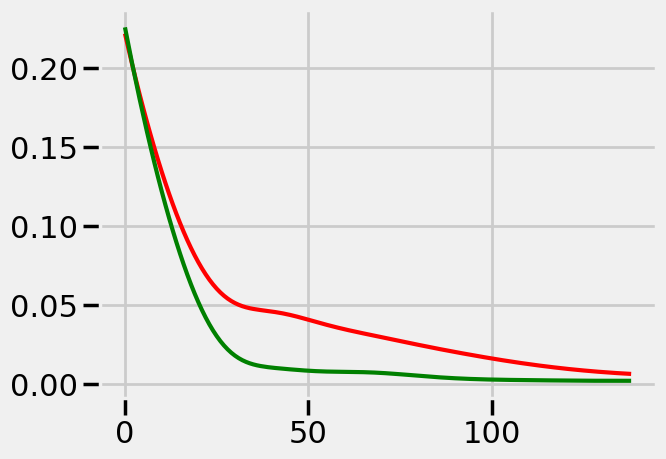

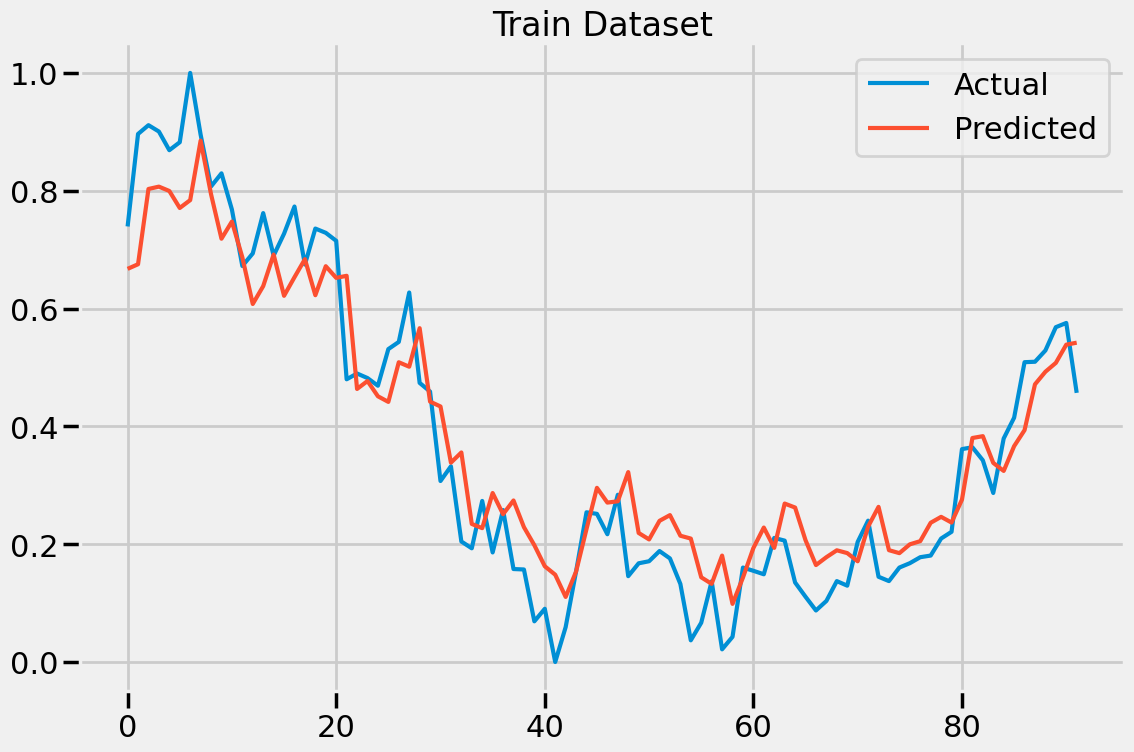

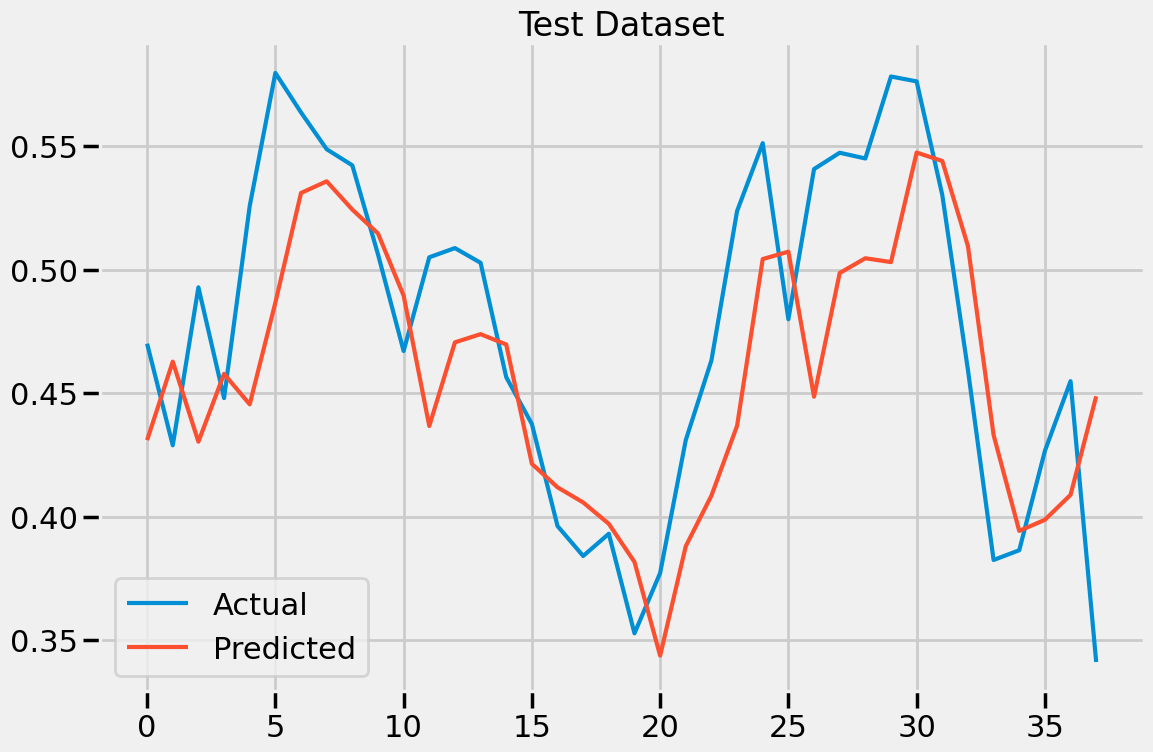

In [726]:
# In[1134]:


# droping columns we don't want to predict

reframed.drop(reframed.columns[[2,3,4,5,6,8,9,10,11]], axis=1, inplace=True)
print(reframed.head())


# In[1135]:


values = reframed.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 92

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

from sklearn.utils import class_weight
sample_weights = class_weight.compute_sample_weight('balanced', train)

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


# In[1136]:


values


# In[1138]:


#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(1,2)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
 
#Fit model with history to check for overfitting
history = model.fit(train_X,train_y,epochs=300,batch_size=92,callbacks=[callback],validation_data=(test_X,test_y),shuffle=False)
 
model.summary() 


# In[833]:


pyplot.plot(history.history['loss'], label='LSTM train', color='red')
pyplot.plot(history.history['val_loss'], label='LSTM test', color= 'green')


# In[1085]:


scaler1.scale_


# In[1139]:


plt.figure(figsize=(12,8))
y_pred_train = model.predict(train_X)
plt.plot(train_y, label="Actual")
plt.plot(y_pred_train, label="Predicted")
plt.legend()
plt.title("Train Dataset")


# In[1140]:


plt.figure(figsize=(12,8))
y_pred_test = model.predict(test_X)
plt.plot(test_y, label="Actual")
plt.plot(y_pred_test, label="Predicted")
plt.legend()
plt.title("Test Dataset")


# In[1088]:


print('y test:', test_y.shape)
print('y_pred_test :', y_pred_test.shape)
print('y train :', train_y.shape)
print('y_pred_train:', y_pred_train.shape)


# # Evaluate GRU

# In[1141]:


# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
  
# Calculate mean squared error
print('MSE:',mean_squared_error(test_y, y_pred_test))

print('MAE:',mean_absolute_error(test_y, y_pred_test))

print('MAPE:', mape(test_y, y_pred_test))

print('RMSE:',sqrt(mean_squared_error(test_y, y_pred_test)) )


# In[1111]:


from sklearn.metrics import r2_score

2/2 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Test Dataset')

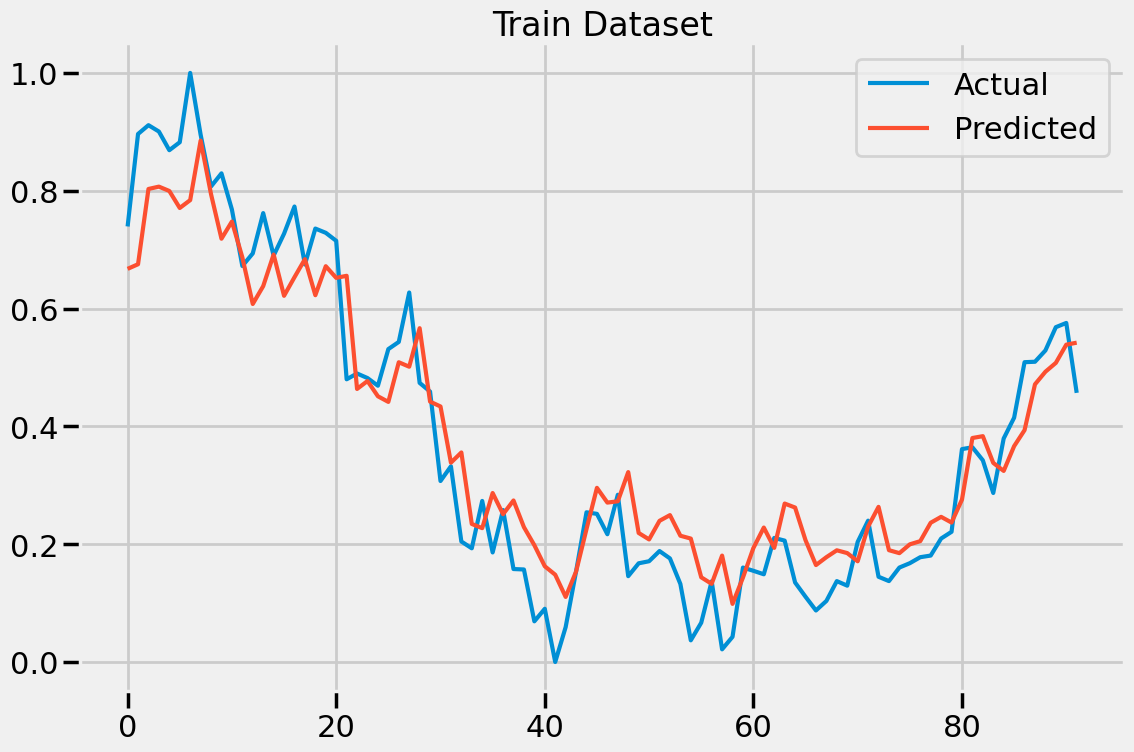

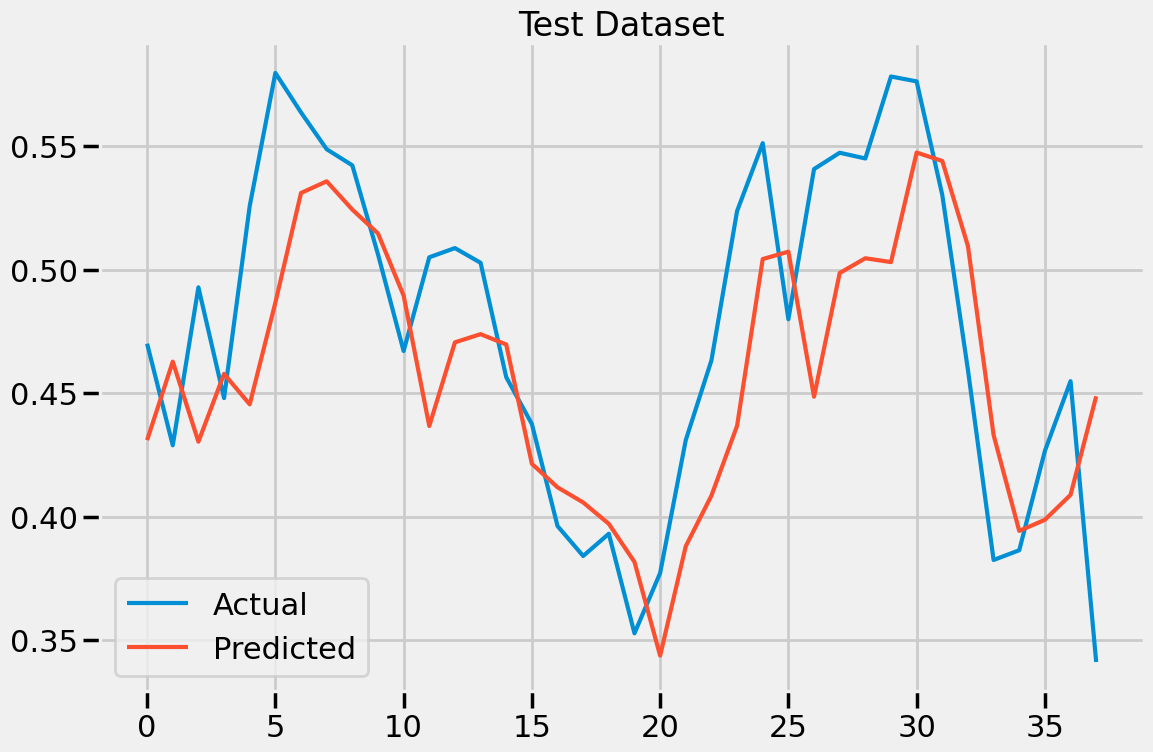

In [727]:
plt.figure(figsize=(12,8))
y_pred_train = model.predict(train_X)
plt.plot(train_y, label="Actual")
plt.plot(y_pred_train, label="Predicted")
plt.legend()
plt.title("Train Dataset")


# In[1140]:


plt.figure(figsize=(12,8))
y_pred_test = model.predict(test_X)
plt.plot(test_y, label="Actual")
plt.plot(y_pred_test, label="Predicted")
plt.legend()
plt.title("Test Dataset")

---------------------------------------

In [728]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
  
# Calculate mean squared error
print('MSE:',mean_squared_error(test_y, y_pred_test))

print('MAE:',mean_absolute_error(test_y, y_pred_test))

print('MAPE:', mape(test_y, y_pred_test))

print('RMSE:',sqrt(mean_squared_error(test_y, y_pred_test)) )

MSE: 0.0023165224
MAE: 0.040228356
MAPE: 0.15101036
RMSE: 0.048130265031496415


# LSTM3
- https://www.datacamp.com/tutorial/lstm-python-stock-market
- https://machinelearningmastery.com/how-to-scale-data-for-long-short-term-memory-networks-in-python/
- https://www.analyticsvidhya.com/blog/2021/05/bitcoin-price-prediction-using-recurrent-neural-networks-and-lstm/
- https://predictivehacks.com/predict-stock-prices-with-lstm/

In [666]:
#Libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [667]:
import copy
d1 = copy.deepcopy(datasetcompleet)
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
 3   26ema         131 non-null    float64       
 4   12ema         131 non-null    float64       
 5   MACD          131 non-null    float64       
 6   momentum      131 non-null    float64       
 7   log_momentum  131 non-null    float64       
 8   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.2 KB


In [668]:
# dropping passed columns
d1.drop([ "26ema", '12ema','Date', 'momentum', 'log_momentum'], axis = 1, inplace = True)
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   polaritymean  131 non-null    float64
 1   Price         131 non-null    float64
 2   MACD          131 non-null    float64
 3   ma50          131 non-null    float64
dtypes: float64(4)
memory usage: 5.1 KB


In [669]:
# Scaling the entire dataset

b_lstm = d1

b_lstm_values = b_lstm.astype('float32')

b_lstm_values_scaler = MinMaxScaler(feature_range=(0, 1))
b_lstm_values_scaled = b_lstm_values_scaler.fit_transform(b_lstm_values)

In [670]:
b_lstm_values_scaled.shape

(131, 4)

In [671]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

In [672]:
# converting the dataset as supervised learning

reframed = series_to_supervised(b_lstm_values_scaled, 1, 1)
print(reframed.shape)

(130, 8)


In [673]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var1(t)',
       'var2(t)', 'var3(t)', 'var4(t)'],
      dtype='object')

In [674]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   polaritymean  131 non-null    float64
 1   Price         131 non-null    float64
 2   MACD          131 non-null    float64
 3   ma50          131 non-null    float64
dtypes: float64(4)
memory usage: 5.1 KB


In [675]:
# droping columns we don't want to predict

reframed.drop(reframed.columns[[4,6,7]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var2(t)
1   0.782629   0.745732   0.722503   0.804468  0.739392
2   0.013458   0.739392   0.762127   0.796180  0.896363
3   0.026208   0.896363   0.835652   0.801407  0.911307
4   0.825867   0.911307   0.894109   0.805739  0.900520
5   0.739854   0.900520   0.932693   0.811244  0.868836


In [676]:
values1 = reframed.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 92

train = values1[:n_train_hours, :]
test = values1[n_train_hours:, :]

from sklearn.utils import class_weight
sample_weights = class_weight.compute_sample_weight('balanced', train)

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(92, 1, 4) (92,) (38, 1, 4) (38,)


In [677]:
callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(1,4)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
 
#Fit model with history to check for overfitting
history = model.fit(train_X,train_y,epochs=300,batch_size=38,callbacks=[callback],validation_data=(test_X,test_y),shuffle=False)
 
model.summary() 

Epoch 1/300
3/3 [==============================] - 3s 277ms/step - loss: 0.2076 - val_loss: 0.1883
Epoch 2/300
3/3 [==============================] - 0s 38ms/step - loss: 0.1709 - val_loss: 0.1514
Epoch 3/300
3/3 [==============================] - 0s 31ms/step - loss: 0.1404 - val_loss: 0.1192
Epoch 4/300
3/3 [==============================] - 0s 24ms/step - loss: 0.1144 - val_loss: 0.0915
Epoch 5/300
3/3 [==============================] - 0s 29ms/step - loss: 0.0925 - val_loss: 0.0682
Epoch 6/300
3/3 [==============================] - 0s 32ms/step - loss: 0.0746 - val_loss: 0.0491
Epoch 7/300
3/3 [==============================] - 0s 35ms/step - loss: 0.0605 - val_loss: 0.0341
Epoch 8/300
3/3 [==============================] - 0s 33ms/step - loss: 0.0500 - val_loss: 0.0229
Epoch 9/300
3/3 [==============================] - 0s 35ms/step - loss: 0.0427 - val_loss: 0.0151
Epoch 10/300
3/3 [==============================] - 0s 46ms/step - loss: 0.0381 - val_loss: 0.0102
Epoch 11/300
3/3 [

3/3 [==============================] - 1s 5ms/step


Text(0.5, 1.0, 'Train Dataset')

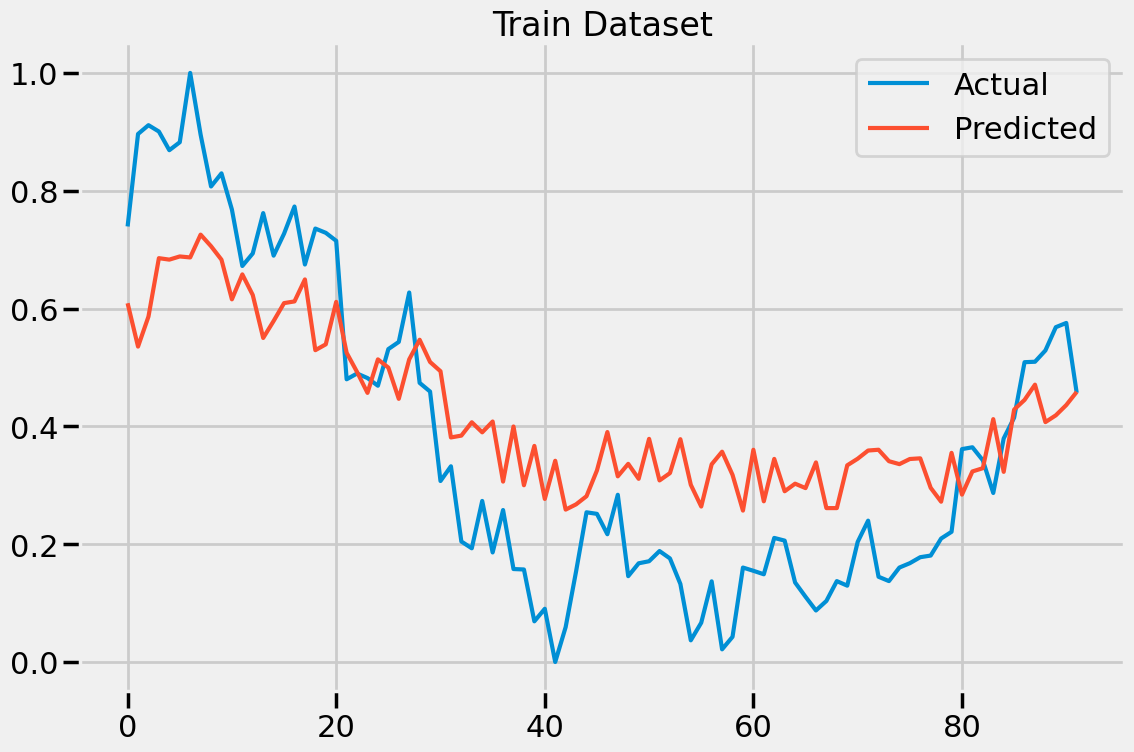

In [678]:
plt.figure(figsize=(12,8))
y_pred_train = model.predict(train_X)
plt.plot(train_y, label="Actual")
plt.plot(y_pred_train, label="Predicted")
plt.legend()
plt.title("Train Dataset")

2/2 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'Test Dataset')

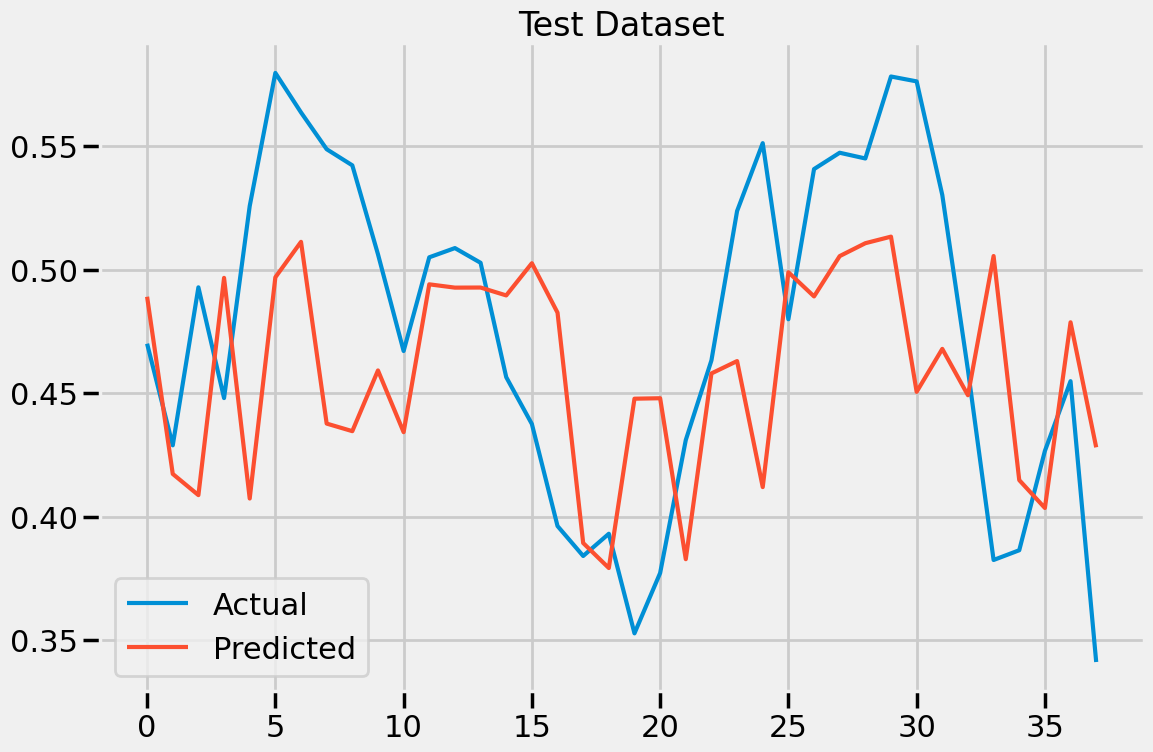

In [679]:
plt.figure(figsize=(12,8))
y_pred_test = model.predict(test_X)
plt.plot(test_y, label="Actual")
plt.plot(y_pred_test, label="Predicted")
plt.legend()
plt.title("Test Dataset")

# Evaluate lstm

In [680]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
  
# Calculate mean squared error
print('MSE:',mean_squared_error(test_y, y_pred_test))

print('MAE:',mean_absolute_error(test_y, y_pred_test))

print('MAPE:', mape(test_y, y_pred_test))

print('RMSE:',sqrt(mean_squared_error(test_y, y_pred_test)) )

MSE: 0.0044249487
MAE: 0.054469276
MAPE: 0.14170338
RMSE: 0.06652028796501282


# GRU1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
 3   26ema         131 non-null    float64       
 4   12ema         131 non-null    float64       
 5   MACD          131 non-null    float64       
 6   momentum      131 non-null    float64       
 7   log_momentum  131 non-null    float64       
 8   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.2 KB
(130, 12)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.782629   0.745732   0.615873   0.628674   0.722503   0.804468  0.013458   
2   0.013458   0.739392   0.648388   0.669884   0.762127   0.796180  0.026208   
3   0.026208   0.896363   0.69976

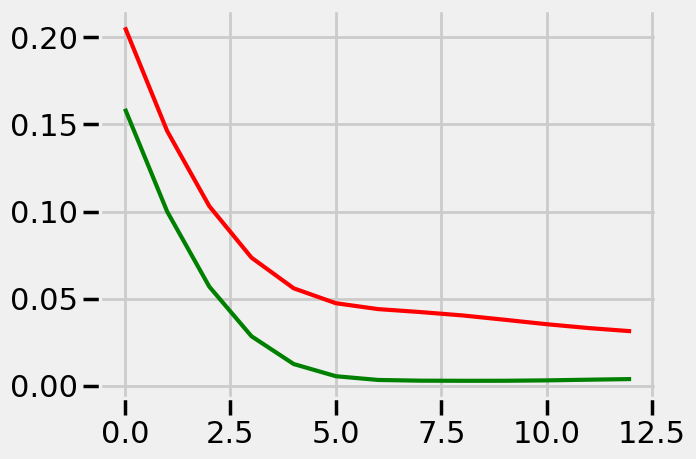

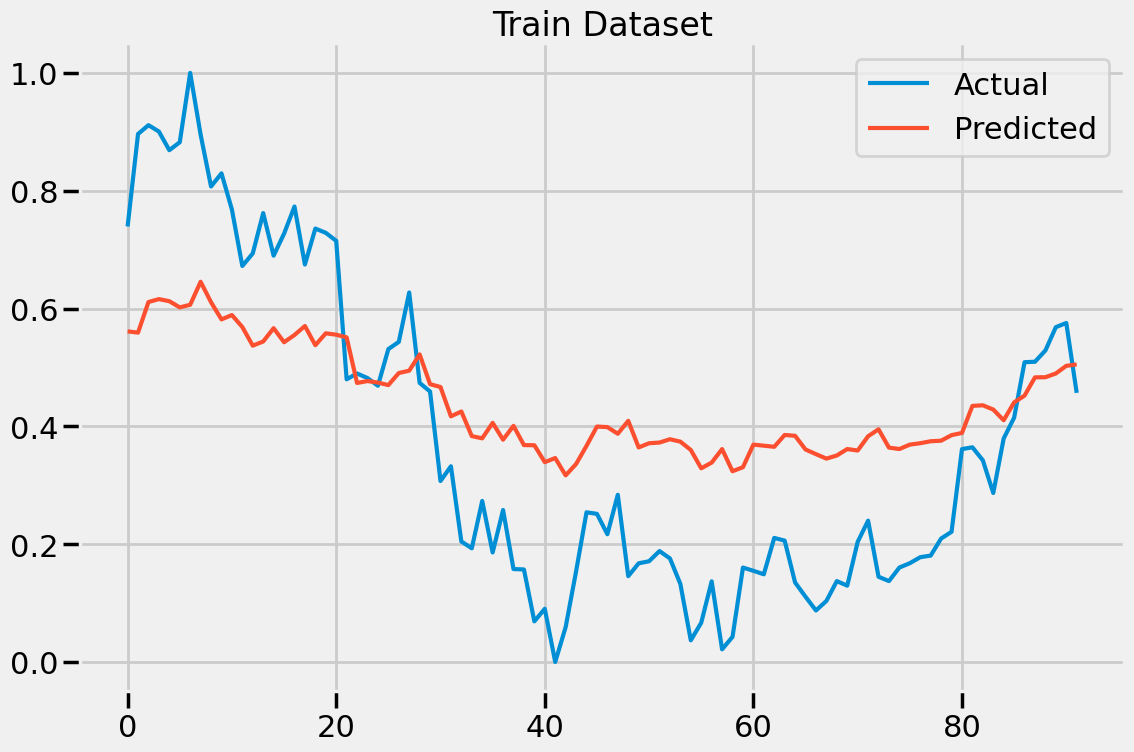

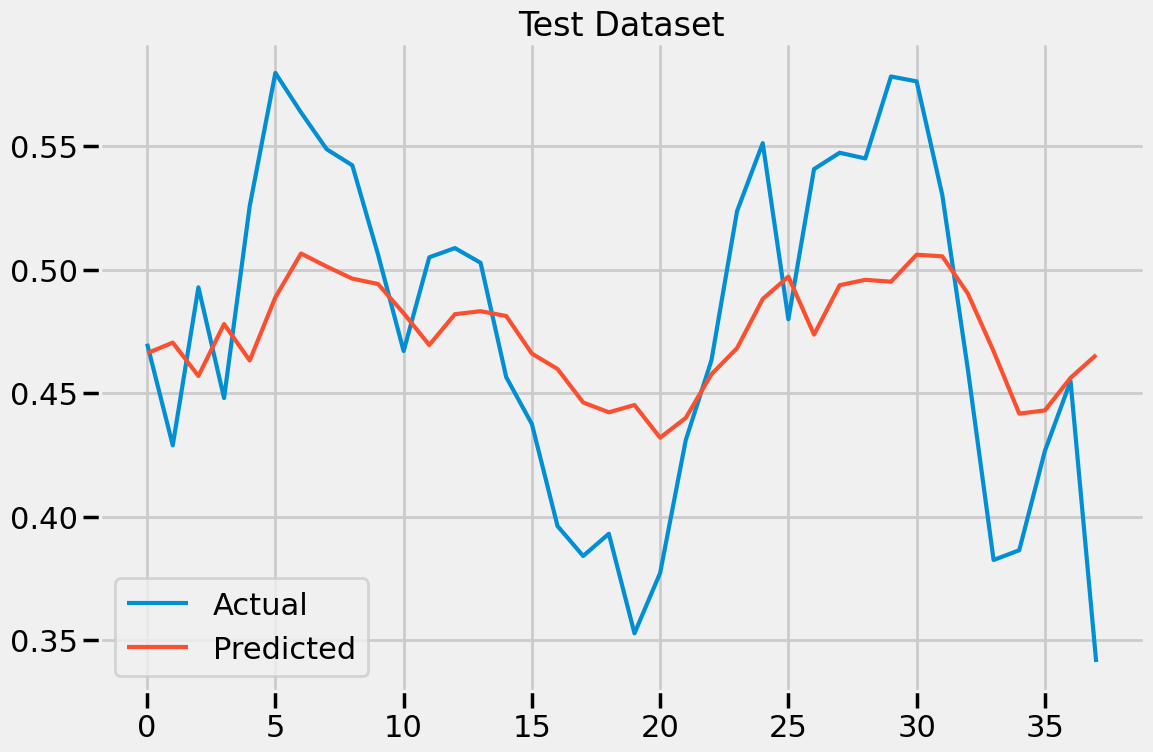

In [681]:
from matplotlib import pyplot
from keras.layers import LSTM, GRU


# In[1121]:


datasetcompleet.head()


# In[1122]:


import copy
a = copy.deepcopy(datasetcompleet)
a.info()


# In[1123]:


# dropping passed columns
a.drop(["momentum", "log_momentum"], axis = 1, inplace = True)


# In[1124]:


a


# In[1125]:


del a["Date"]


# In[1126]:


a


# In[1127]:


# Scaling the entire dataset

dataset1 = a
values1 = dataset1.values

values1 = values1.astype('float32')

scaler1 = MinMaxScaler()
scaled = scaler1.fit_transform(values1)


# In[1128]:


scaled.shape


# In[1129]:


def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg


# In[1130]:


# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)


# In[1131]:


print(reframed.head())


# In[1132]:


reframed.columns


# In[1133]:


a.info()


# In[1134]:


# droping columns we don't want to predict

reframed.drop(reframed.columns[[0,2,3,4,5,6,8,9,10,11]], axis=1, inplace=True)
print(reframed.head())


# In[1135]:


values = reframed.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 92

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

from sklearn.utils import class_weight
sample_weights = class_weight.compute_sample_weight('balanced', train)

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


# In[1136]:


values


# In[1138]:


#Build the model
model = Sequential()
model.add(GRU(256,input_shape=(1,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
 
#Fit model with history to check for overfitting
history = model.fit(train_X,train_y,epochs=300,batch_size=21,callbacks=[callback],validation_data=(test_X,test_y),shuffle=False)
 
model.summary() 


# In[833]:


pyplot.plot(history.history['loss'], label='GRU train', color='red')
pyplot.plot(history.history['val_loss'], label='GRU test', color= 'green')


# In[1085]:


scaler1.scale_


# In[1139]:


plt.figure(figsize=(12,8))
y_pred_train = model.predict(train_X)
plt.plot(train_y, label="Actual")
plt.plot(y_pred_train, label="Predicted")
plt.legend()
plt.title("Train Dataset")


# In[1140]:


plt.figure(figsize=(12,8))
y_pred_test = model.predict(test_X)
plt.plot(test_y, label="Actual")
plt.plot(y_pred_test, label="Predicted")
plt.legend()
plt.title("Test Dataset")


# In[1088]:


print('y test:', test_y.shape)
print('y_pred_test :', y_pred_test.shape)
print('y train :', train_y.shape)
print('y_pred_train:', y_pred_train.shape)


# # Evaluate GRU

# In[1141]:


# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
  
# Calculate mean squared error
print('MSE:',mean_squared_error(test_y, y_pred_test))

print('MAE:',mean_absolute_error(test_y, y_pred_test))

print('MAPE:', mape(test_y, y_pred_test))

print('RMSE:',sqrt(mean_squared_error(test_y, y_pred_test)) )


# In[1111]:


from sklearn.metrics import r2_score

In [346]:
print('There are {} number of days in the dataset.'.format(values.shape[0]))

There are 179 number of days in the dataset.


In [332]:
print(reframed)
a.info()

     var2(t-1)   var2(t)
1     0.924162  0.779833
2     0.779833  0.814727
3     0.814727  0.777803
4     0.777803  0.710414
5     0.710414  0.711612
..         ...       ...
175   0.459336  0.382435
176   0.382435  0.386379
177   0.386379  0.426569
178   0.426569  0.454813
179   0.454813  0.341143

[179 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   polaritymean  180 non-null    float64
 1   Price         180 non-null    float64
 2   26ema         180 non-null    float64
 3   12ema         180 non-null    float64
 4   MACD          180 non-null    float64
 5   ema           180 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


2/2 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'Test Dataset')

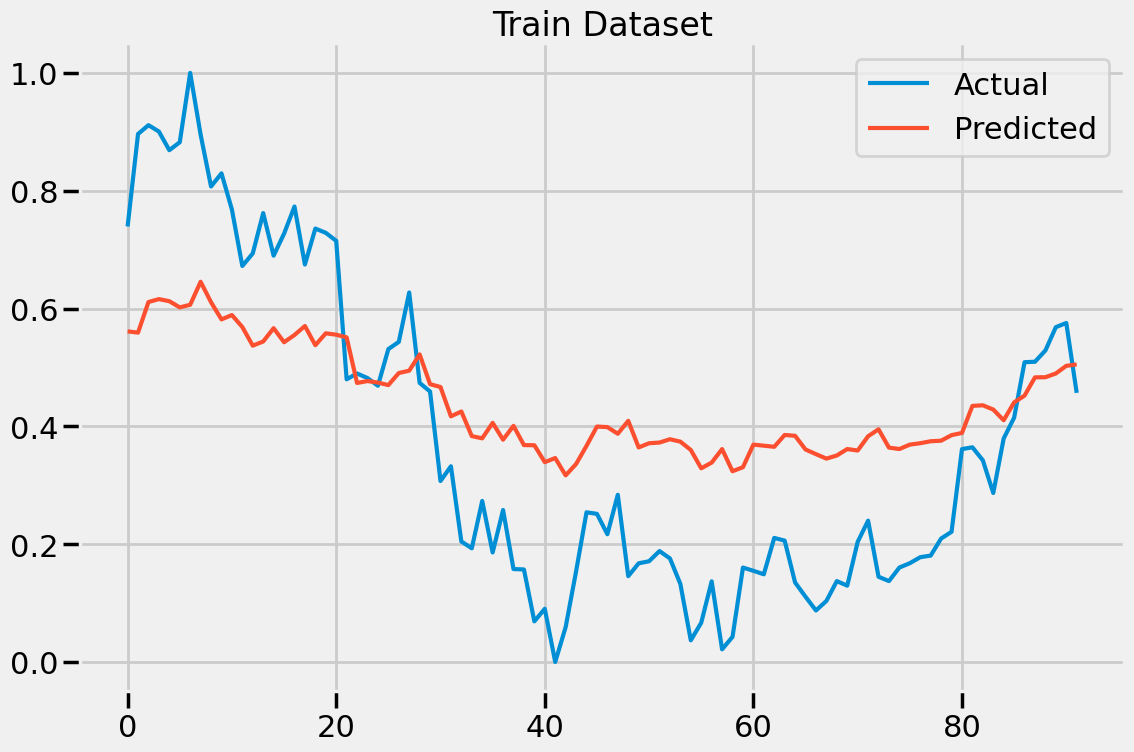

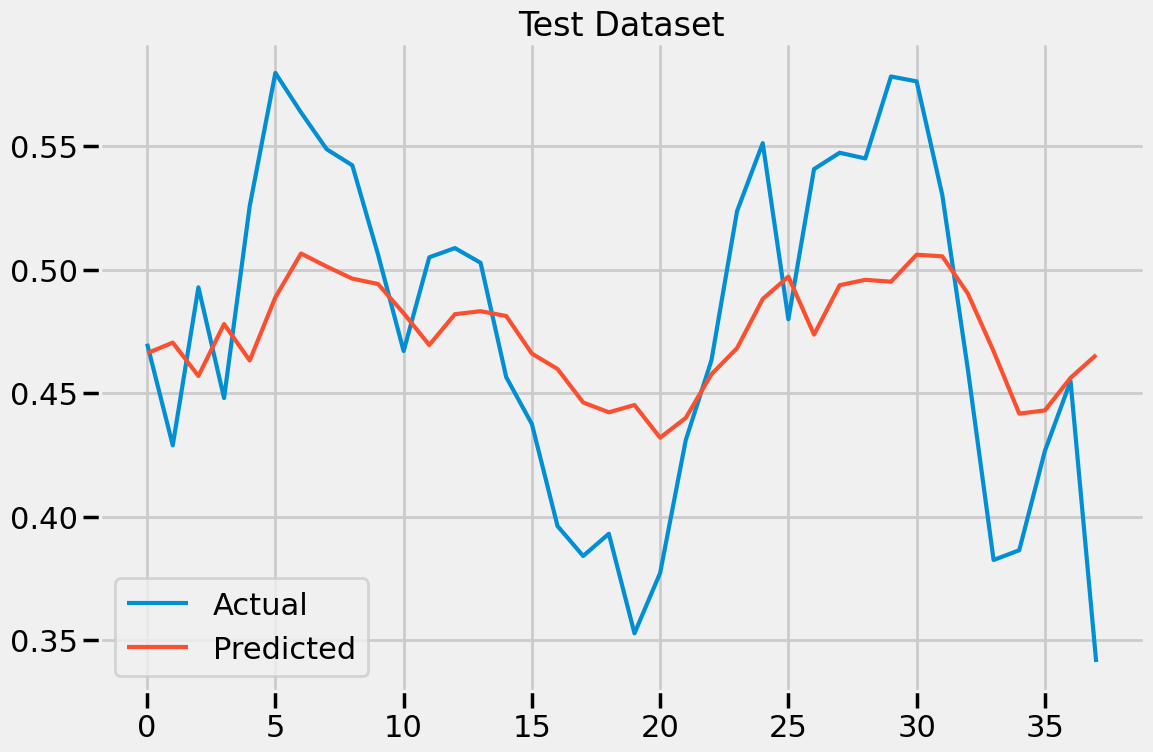

In [682]:
plt.figure(figsize=(12,8))
y_pred_train = model.predict(train_X)
plt.plot(train_y, label="Actual")
plt.plot(y_pred_train, label="Predicted")
plt.legend()
plt.title("Train Dataset")


# In[1140]:


plt.figure(figsize=(12,8))
y_pred_test = model.predict(test_X)
plt.plot(test_y, label="Actual")
plt.plot(y_pred_test, label="Predicted")
plt.legend()
plt.title("Test Dataset")

In [683]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
  
# Calculate mean squared error
print('MSE:',mean_squared_error(test_y, y_pred_test))

print('MAE:',mean_absolute_error(test_y, y_pred_test))

print('MAPE:', mape(test_y, y_pred_test))

print('RMSE:',sqrt(mean_squared_error(test_y, y_pred_test)) )


# In[1111]:


from sklearn.metrics import r2_score

MSE: 0.0027961524
MAE: 0.045004718
MAPE: 0.1301467
RMSE: 0.05287865707235614


# GRU2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
 3   26ema         131 non-null    float64       
 4   12ema         131 non-null    float64       
 5   MACD          131 non-null    float64       
 6   momentum      131 non-null    float64       
 7   log_momentum  131 non-null    float64       
 8   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.2 KB
(130, 12)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.782629   0.745732   0.615873   0.628674   0.722503   0.804468  0.013458   
2   0.013458   0.739392   0.648388   0.669884   0.762127   0.796180  0.026208   
3   0.026208   0.896363   0.69976

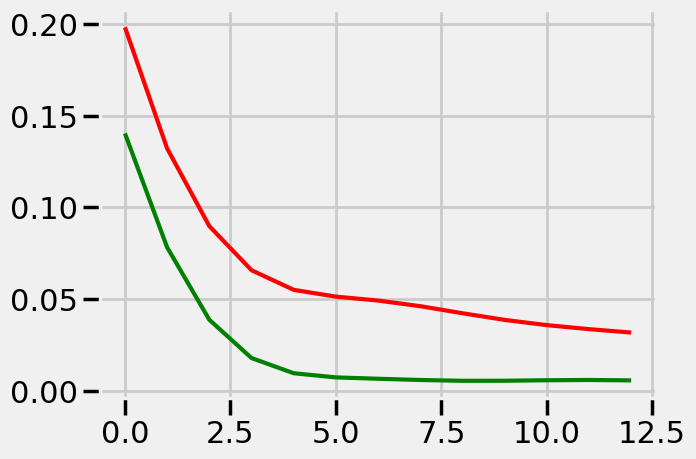

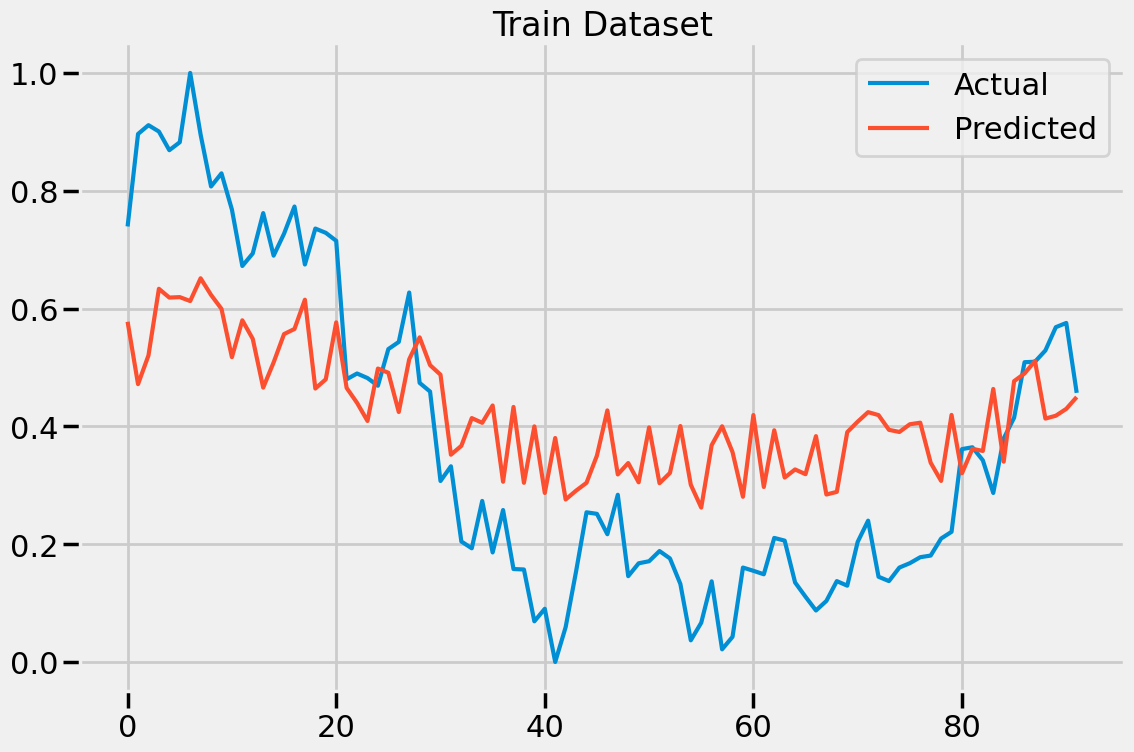

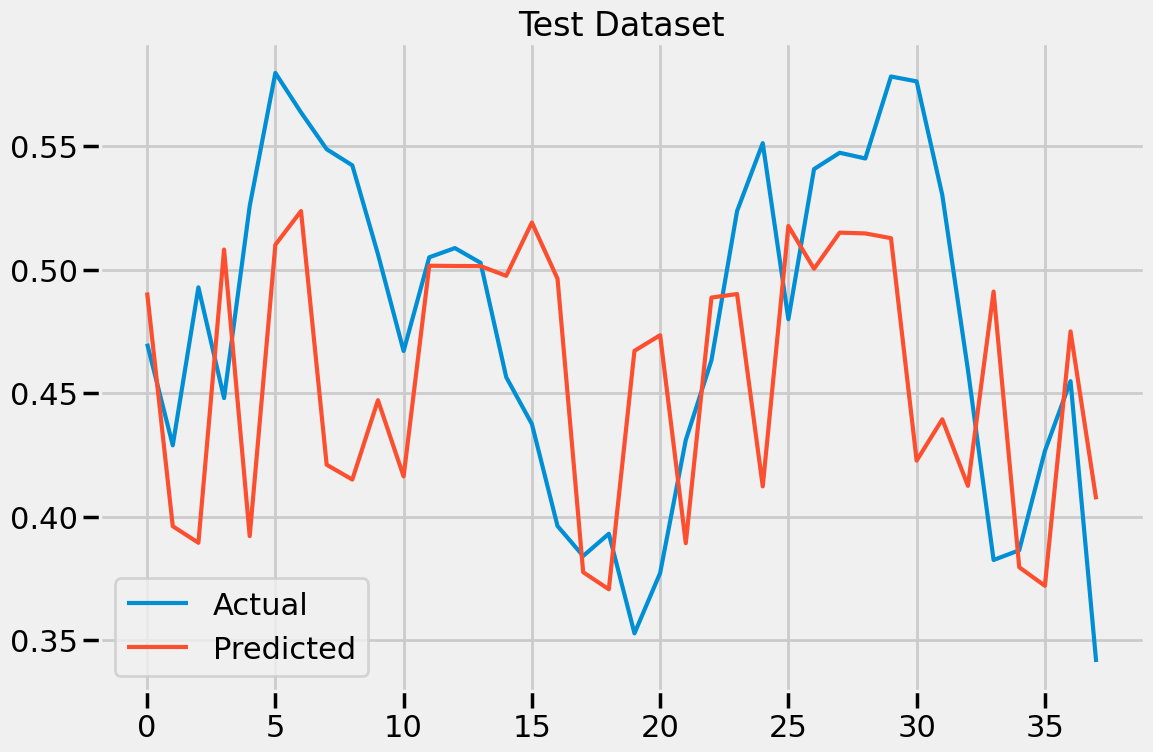

In [684]:
from matplotlib import pyplot
from keras.layers import LSTM, GRU


# In[1121]:


datasetcompleet.head()


# In[1122]:


import copy
a = copy.deepcopy(datasetcompleet)
a.info()


# In[1123]:


# dropping passed columns
a.drop(["momentum", "log_momentum"], axis = 1, inplace = True)


# In[1124]:


a


# In[1125]:


del a["Date"]


# In[1126]:


a


# In[1127]:


# Scaling the entire dataset

dataset1 = a
values1 = dataset1.values

values1 = values1.astype('float32')

scaler1 = MinMaxScaler()
scaled = scaler1.fit_transform(values1)


# In[1128]:


scaled.shape


# In[1129]:


def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg


# In[1130]:


# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)


# In[1131]:


print(reframed.head())


# In[1132]:


reframed.columns


# In[1133]:


a.info()


# In[1134]:


# droping columns we don't want to predict

reframed.drop(reframed.columns[[2,3,4,5,6,8,9,10,11]], axis=1, inplace=True)
print(reframed.head())


# In[1135]:


values = reframed.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 92

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

from sklearn.utils import class_weight
sample_weights = class_weight.compute_sample_weight('balanced', train)

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


# In[1136]:


values


# In[1138]:


#Build the model
model = Sequential()
model.add(GRU(256,input_shape=(1,2)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
 
#Fit model with history to check for overfitting
history = model.fit(train_X,train_y,epochs=300,batch_size=21,callbacks=[callback],validation_data=(test_X,test_y),shuffle=False)
 
model.summary() 


# In[833]:


pyplot.plot(history.history['loss'], label='GRU train', color='red')
pyplot.plot(history.history['val_loss'], label='GRU test', color= 'green')


# In[1085]:


scaler1.scale_


# In[1139]:


plt.figure(figsize=(12,8))
y_pred_train = model.predict(train_X)
plt.plot(train_y, label="Actual")
plt.plot(y_pred_train, label="Predicted")
plt.legend()
plt.title("Train Dataset")


# In[1140]:


plt.figure(figsize=(12,8))
y_pred_test = model.predict(test_X)
plt.plot(test_y, label="Actual")
plt.plot(y_pred_test, label="Predicted")
plt.legend()
plt.title("Test Dataset")


# In[1088]:


print('y test:', test_y.shape)
print('y_pred_test :', y_pred_test.shape)
print('y train :', train_y.shape)
print('y_pred_train:', y_pred_train.shape)


# # Evaluate GRU

# In[1141]:


# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
  
# Calculate mean squared error
print('MSE:',mean_squared_error(test_y, y_pred_test))

print('MAE:',mean_absolute_error(test_y, y_pred_test))

print('MAPE:', mape(test_y, y_pred_test))

print('RMSE:',sqrt(mean_squared_error(test_y, y_pred_test)) )


# In[1111]:


from sklearn.metrics import r2_score

2/2 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'Test Dataset')

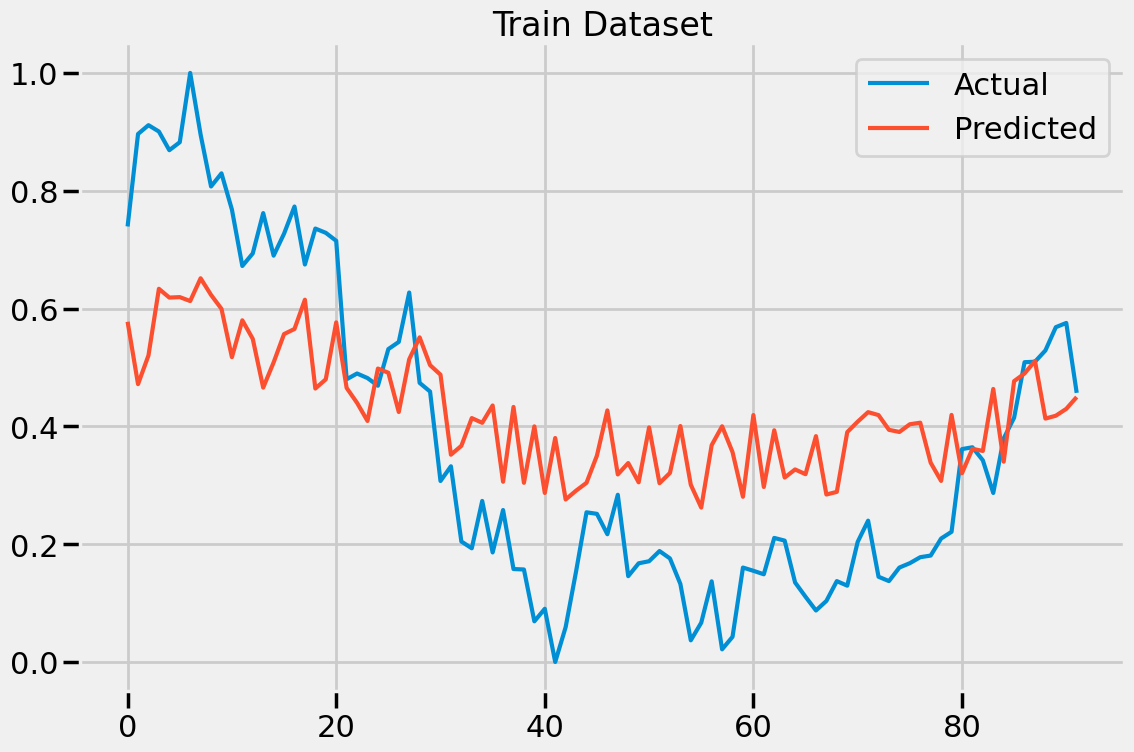

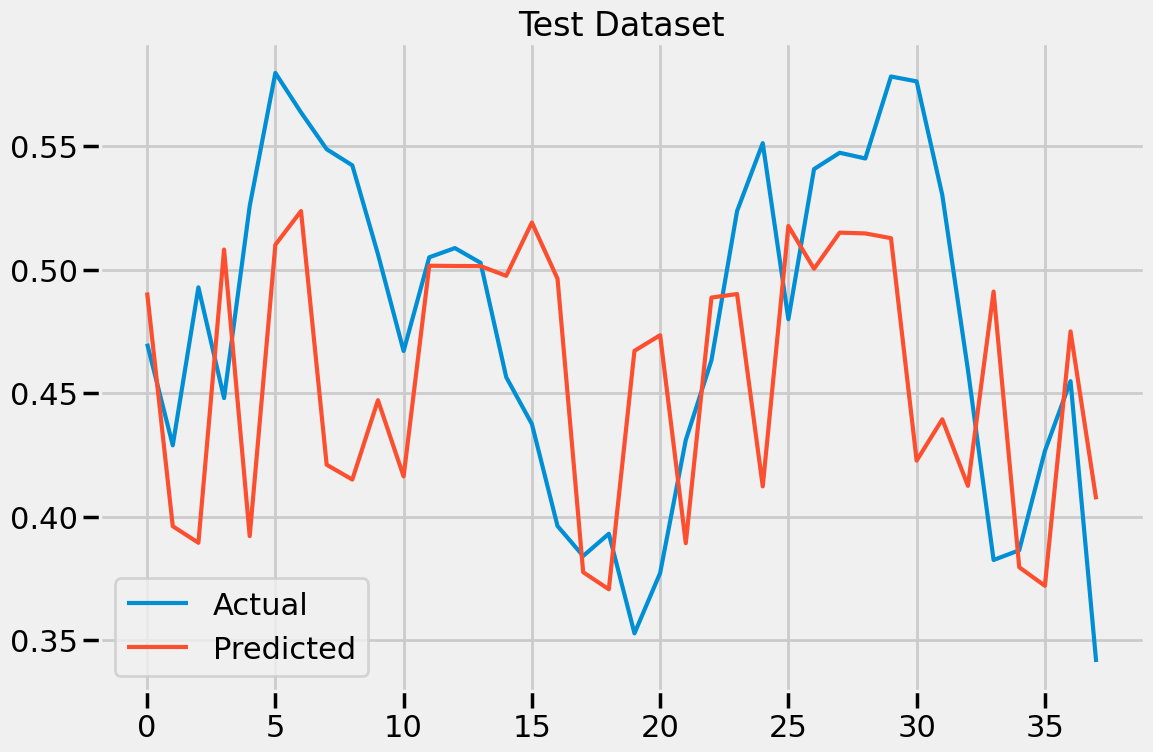

In [685]:
plt.figure(figsize=(12,8))
y_pred_train = model.predict(train_X)
plt.plot(train_y, label="Actual")
plt.plot(y_pred_train, label="Predicted")
plt.legend()
plt.title("Train Dataset")


# In[1140]:


plt.figure(figsize=(12,8))
y_pred_test = model.predict(test_X)
plt.plot(test_y, label="Actual")
plt.plot(y_pred_test, label="Predicted")
plt.legend()
plt.title("Test Dataset")

In [686]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
  
# Calculate mean squared error
print('MSE:',mean_squared_error(test_y, y_pred_test))

print('MAE:',mean_absolute_error(test_y, y_pred_test))

print('MAPE:', mape(test_y, y_pred_test))

print('RMSE:',sqrt(mean_squared_error(test_y, y_pred_test)) )


# In[1111]:


from sklearn.metrics import r2_score

MSE: 0.005410291
MAE: 0.06031572
MAPE: 0.15192513
RMSE: 0.07355467890528194


# GRU3
- https://towardsdatascience.com/forecasting-with-technical-indicators-and-gru-lstm-rnn-multivariate-time-series-a3244dcbc38b
- https://medium.datadriveninvestor.com/multivariate-time-series-using-gated-recurrent-unit-gru-1039099e545a

In [687]:
#libraries
from matplotlib import pyplot
from keras.layers import LSTM, GRU

In [688]:
datasetcompleet.head()

Date  polaritymean       Price       26ema       12ema       MACD  \
0 2022-07-21      0.115474  337.973328  295.735051  304.550810   8.815760   
1 2022-07-20     -0.096564  336.880005  298.844206  309.525525  10.681319   
2 2022-07-19     -0.093049  363.946655  303.756402  317.899420  14.143018   
3 2022-07-18      0.127393  366.523346  308.485853  325.381093  16.895239   
4 2022-07-15      0.103682  364.663330  312.713401  331.425244  18.711843   

     momentum  log_momentum        ma50  
0  336.973328      5.820004  299.383997  
1  335.880005      5.816754  298.746797  
2  362.946655      5.894256  299.148664  
3  365.523346      5.901330  299.481731  
4  363.663330      5.896229  299.904931

In [689]:
import copy
a = copy.deepcopy(datasetcompleet)
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   polaritymean  131 non-null    float64       
 2   Price         131 non-null    float64       
 3   26ema         131 non-null    float64       
 4   12ema         131 non-null    float64       
 5   MACD          131 non-null    float64       
 6   momentum      131 non-null    float64       
 7   log_momentum  131 non-null    float64       
 8   ma50          131 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.2 KB


In [690]:
# dropping passed columns
a.drop(["momentum", "log_momentum"], axis = 1, inplace = True)

In [691]:
a

Date  polaritymean       Price       26ema       12ema       MACD  \
0   2022-07-21      0.115474  337.973328  295.735051  304.550810   8.815760   
1   2022-07-20     -0.096564  336.880005  298.844206  309.525525  10.681319   
2   2022-07-19     -0.093049  363.946655  303.756402  317.899420  14.143018   
3   2022-07-18      0.127393  366.523346  308.485853  325.381093  16.895239   
4   2022-07-15      0.103682  364.663330  312.713401  331.425244  18.711843   
..         ...           ...         ...         ...         ...        ...   
126 2022-01-19     -0.067599  275.329987  291.824009  294.150896   2.326887   
127 2022-01-18     -0.085428  276.010010  290.652600  291.359990   0.707390   
128 2022-01-14      0.101945  282.940002  290.081296  290.064607  -0.016688   
129 2022-01-13     -0.055295  287.809998  289.913051  289.717744  -0.195307   
130 2022-01-12     -0.097400  268.209991  288.305416  286.408859  -1.896557   

           ma50  
0    299.383997  
1    298.746797  
2    299.148664  
3    299.481731  
4    299.904931  
..          ...  
126  287.259467  
127  287.978334  
128  288.826201  
129  289.671801  
130  290.086001  

[131 rows x 7 columns]

In [692]:
del a["Date"]

In [693]:
a

polaritymean       Price       26ema       12ema       MACD        ma50
0        0.115474  337.973328  295.735051  304.550810   8.815760  299.383997
1       -0.096564  336.880005  298.844206  309.525525  10.681319  298.746797
2       -0.093049  363.946655  303.756402  317.899420  14.143018  299.148664
3        0.127393  366.523346  308.485853  325.381093  16.895239  299.481731
4        0.103682  364.663330  312.713401  331.425244  18.711843  299.904931
..            ...         ...         ...         ...        ...         ...
126     -0.067599  275.329987  291.824009  294.150896   2.326887  287.259467
127     -0.085428  276.010010  290.652600  291.359990   0.707390  287.978334
128      0.101945  282.940002  290.081296  290.064607  -0.016688  288.826201
129     -0.055295  287.809998  289.913051  289.717744  -0.195307  289.671801
130     -0.097400  268.209991  288.305416  286.408859  -1.896557  290.086001

[131 rows x 6 columns]

In [694]:
# Scaling the entire dataset

dataset1 = a
values1 = dataset1.values

values1 = values1.astype('float32')

scaler1 = MinMaxScaler()
scaled = scaler1.fit_transform(values1)

In [695]:
scaled.shape

(131, 6)

In [696]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

In [697]:
# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)

(130, 12)


In [698]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.782629   0.745732   0.615873   0.628674   0.722503   0.804468  0.013458   
2   0.013458   0.739392   0.648388   0.669884   0.762127   0.796180  0.026208   
3   0.026208   0.896363   0.699760   0.739254   0.835652   0.801407  0.825867   
4   0.825867   0.911307   0.749220   0.801232   0.894109   0.805739  0.739854   
5   0.739854   0.900520   0.793432   0.851301   0.932693   0.811244  0.816869   

    var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  
1  0.739392  0.648388  0.669884  0.762127  0.796180  
2  0.896363  0.699760  0.739254  0.835652  0.801407  
3  0.911307  0.749220  0.801232  0.894109  0.805739  
4  0.900520  0.793432  0.851301  0.932693  0.811244  
5  0.868836  0.829973  0.886703  0.949245  0.818350  


In [699]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)',
       'var6(t)'],
      dtype='object')

In [700]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   polaritymean  131 non-null    float64
 1   Price         131 non-null    float64
 2   26ema         131 non-null    float64
 3   12ema         131 non-null    float64
 4   MACD          131 non-null    float64
 5   ma50          131 non-null    float64
dtypes: float64(6)
memory usage: 7.2 KB


In [701]:
# droping columns we don't want to predict

reframed.drop(reframed.columns[[2,3,6,8,9,10,11]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var5(t-1)  var6(t-1)   var2(t)
1   0.782629   0.745732   0.722503   0.804468  0.739392
2   0.013458   0.739392   0.762127   0.796180  0.896363
3   0.026208   0.896363   0.835652   0.801407  0.911307
4   0.825867   0.911307   0.894109   0.805739  0.900520
5   0.739854   0.900520   0.932693   0.811244  0.868836


In [702]:
values = reframed.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 92

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

from sklearn.utils import class_weight
sample_weights = class_weight.compute_sample_weight('balanced', train)

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(92, 1, 4) (92,) (38, 1, 4) (38,)


In [703]:
values

array([[7.82628894e-01, 7.45732427e-01, 7.22503304e-01, 8.04467678e-01,
        7.39391804e-01],
       [1.34578049e-02, 7.39391804e-01, 7.62127161e-01, 7.96179533e-01,
        8.96363497e-01],
       [2.62080133e-02, 8.96363497e-01, 8.35652351e-01, 8.01406622e-01,
        9.11307096e-01],
       [8.25866938e-01, 9.11307096e-01, 8.94108534e-01, 8.05738688e-01,
        9.00519848e-01],
       [7.39853621e-01, 9.00519848e-01, 9.32692528e-01, 8.11243534e-01,
        8.68835688e-01],
       [8.16869140e-01, 8.68835688e-01, 9.49245036e-01, 8.18349600e-01,
        8.82348299e-01],
       [7.37207711e-01, 8.82348299e-01, 9.61382389e-01, 8.26008320e-01,
        1.00000000e+00],
       [7.58854389e-01, 1.00000000e+00, 1.00000000e+00, 8.43485355e-01,
        8.95242453e-01],
       [7.85125613e-01, 8.95242453e-01, 9.94668245e-01, 8.57468843e-01,
        8.07284117e-01],
       [8.07474136e-01, 8.07284117e-01, 9.59805012e-01, 8.68512630e-01,
        8.29515457e-01],
       [1.51782408e-01, 8.2951

In [704]:
#Build the model
model = Sequential()
model.add(GRU(256,input_shape=(1,4)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
 
#Fit model with history to check for overfitting
history = model.fit(train_X,train_y,epochs=300,batch_size=38,callbacks=[callback],validation_data=(test_X,test_y),shuffle=False)
 
model.summary() 

Epoch 1/300
3/3 [==============================] - 3s 290ms/step - loss: 0.2117 - val_loss: 0.1544
Epoch 2/300
3/3 [==============================] - 0s 33ms/step - loss: 0.1391 - val_loss: 0.0894
Epoch 3/300
3/3 [==============================] - 0s 42ms/step - loss: 0.0898 - val_loss: 0.0450
Epoch 4/300
3/3 [==============================] - 0s 47ms/step - loss: 0.0590 - val_loss: 0.0188
Epoch 5/300
3/3 [==============================] - 0s 41ms/step - loss: 0.0435 - val_loss: 0.0070
Epoch 6/300
3/3 [==============================] - 0s 49ms/step - loss: 0.0387 - val_loss: 0.0042
Epoch 7/300
3/3 [==============================] - 0s 39ms/step - loss: 0.0395 - val_loss: 0.0051
Epoch 8/300
3/3 [==============================] - 0s 42ms/step - loss: 0.0408 - val_loss: 0.0060
Epoch 9/300
3/3 [==============================] - 0s 37ms/step - loss: 0.0399 - val_loss: 0.0055
Epoch 10/300
3/3 [==============================] - 0s 42ms/step - loss: 0.0368 - val_loss: 0.0043
Model: "sequential

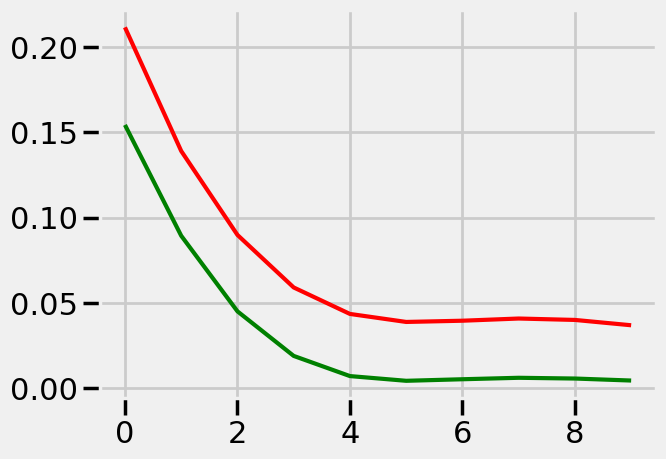

In [705]:
pyplot.plot(history.history['loss'], label='GRU train', color='red')
pyplot.plot(history.history['val_loss'], label='GRU test', color= 'green')

In [706]:
scaler1.scale_

array([3.6275246 , 0.00579945, 0.01045797, 0.008284  , 0.02123963,
       0.01300704], dtype=float32)

3/3 [==============================] - 1s 18ms/step


Text(0.5, 1.0, 'Train Dataset')

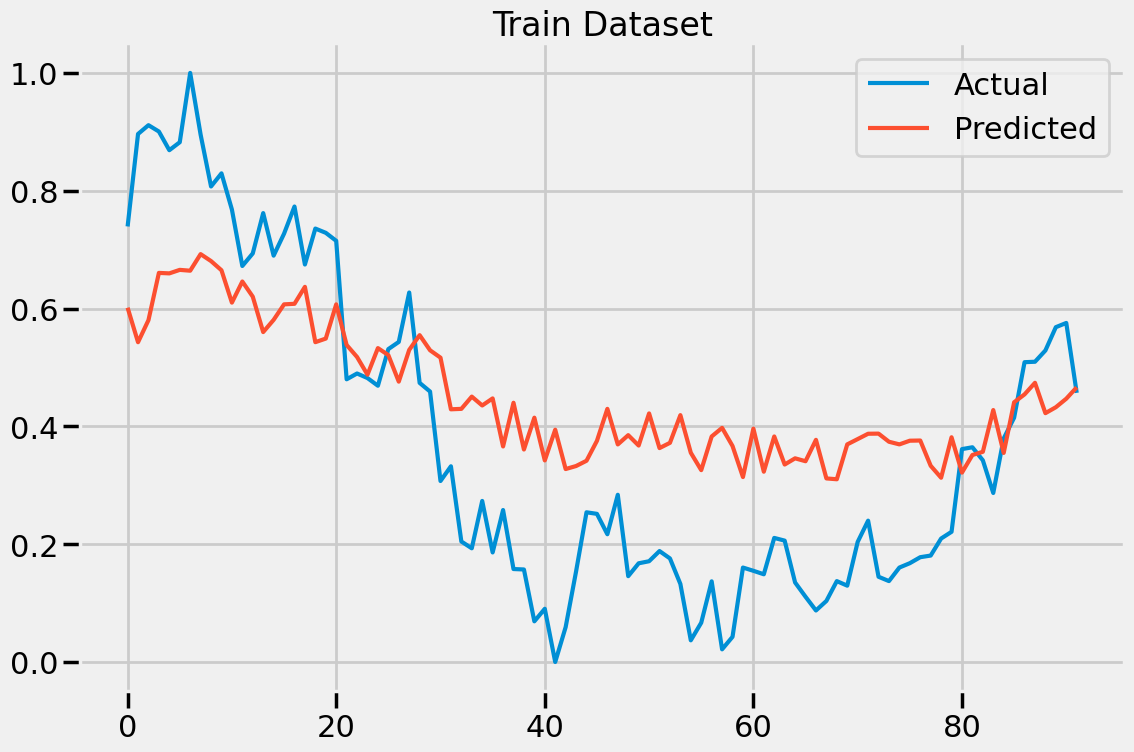

In [707]:
plt.figure(figsize=(12,8))
y_pred_train = model.predict(train_X)
plt.plot(train_y, label="Actual")
plt.plot(y_pred_train, label="Predicted")
plt.legend()
plt.title("Train Dataset")

2/2 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Test Dataset')

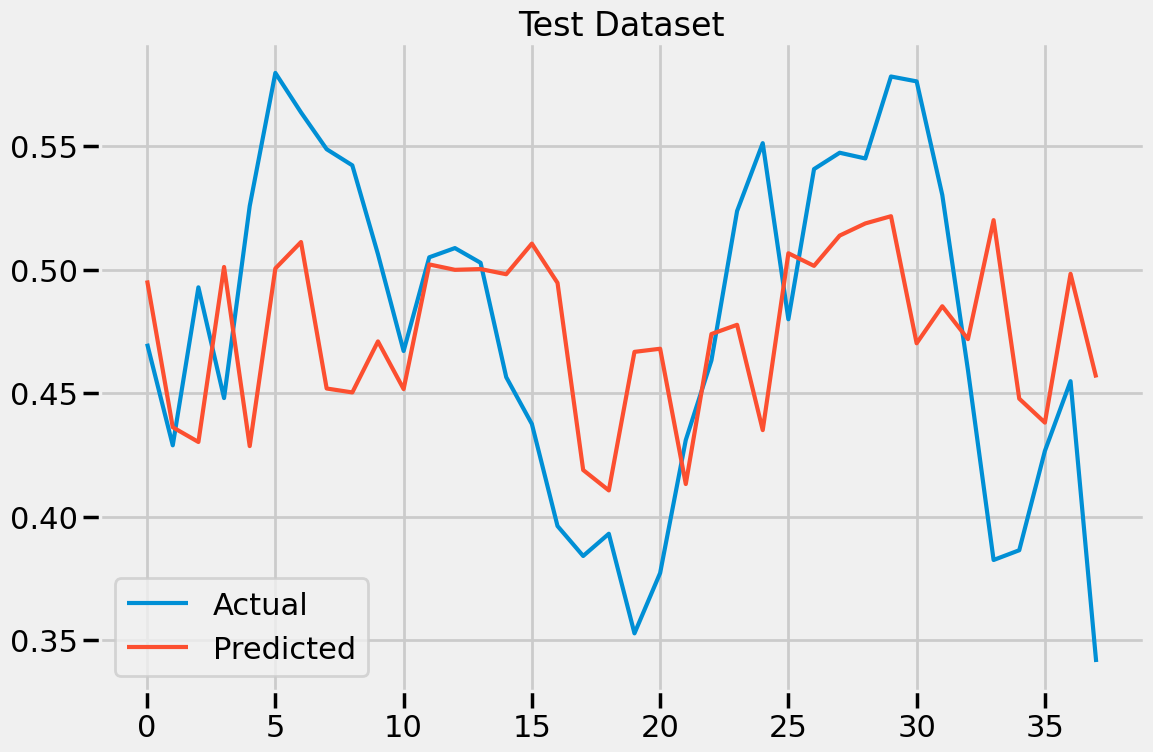

In [708]:
plt.figure(figsize=(12,8))
y_pred_test = model.predict(test_X)
plt.plot(test_y, label="Actual")
plt.plot(y_pred_test, label="Predicted")
plt.legend()
plt.title("Test Dataset")

In [709]:
print('y test:', test_y.shape)
print('y_pred_test :', y_pred_test.shape)
print('y train :', train_y.shape)
print('y_pred_train:', y_pred_train.shape)

y test: (38,)
y_pred_test : (38, 1)
y train : (92,)
y_pred_train: (92, 1)


# Evaluate GRU

In [710]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
  
# Calculate mean squared error
print('MSE:',mean_squared_error(test_y, y_pred_test))

print('MAE:',mean_absolute_error(test_y, y_pred_test))

print('MAPE:', mape(test_y, y_pred_test))

print('RMSE:',sqrt(mean_squared_error(test_y, y_pred_test)) )

MSE: 0.0041959737
MAE: 0.052798837
MAPE: 0.13634476
RMSE: 0.06477633628689776


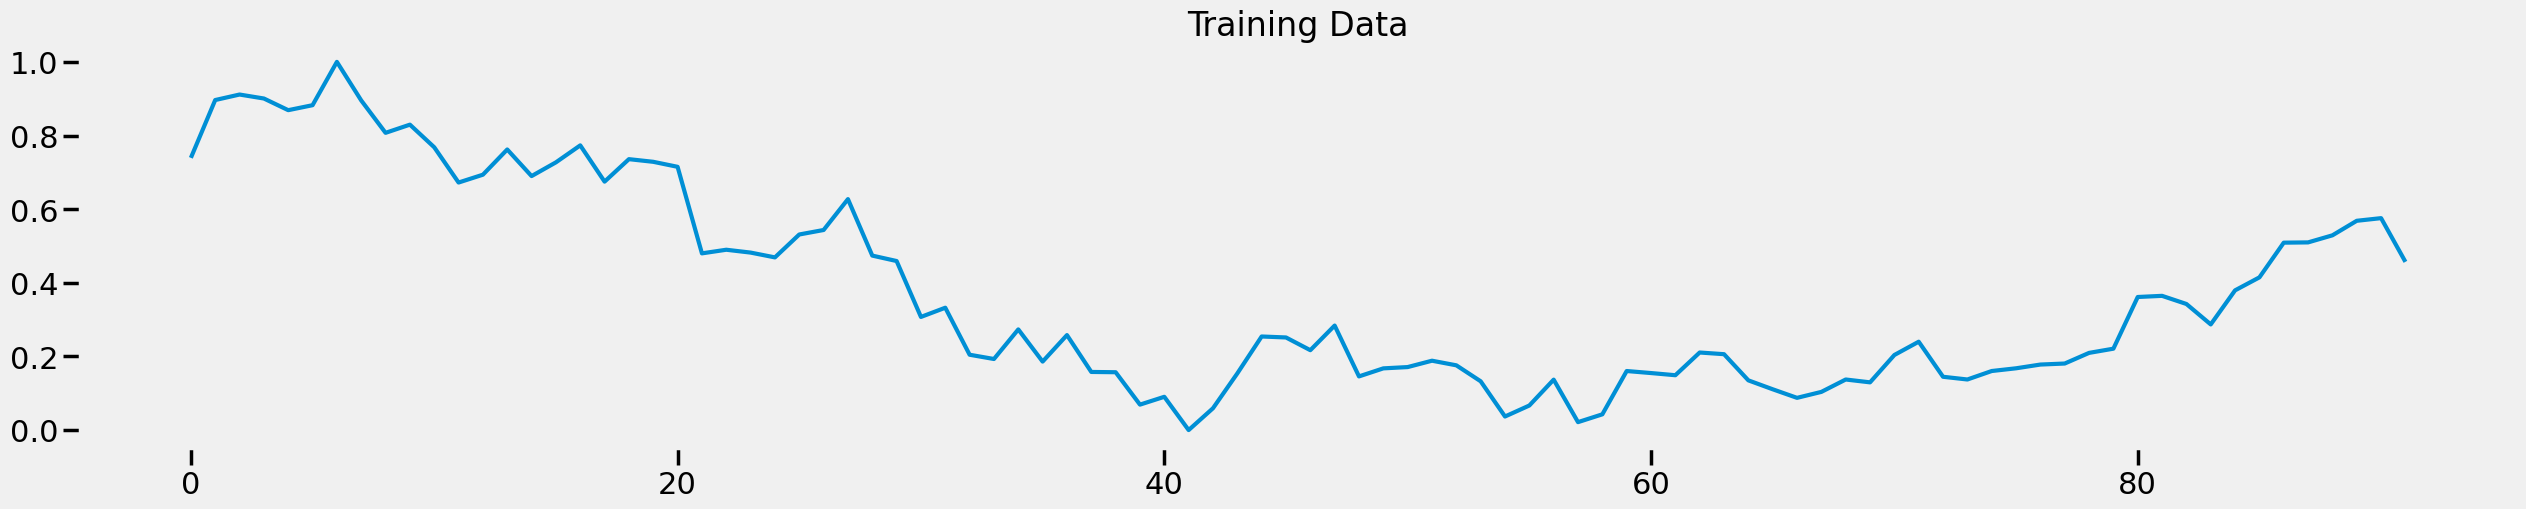

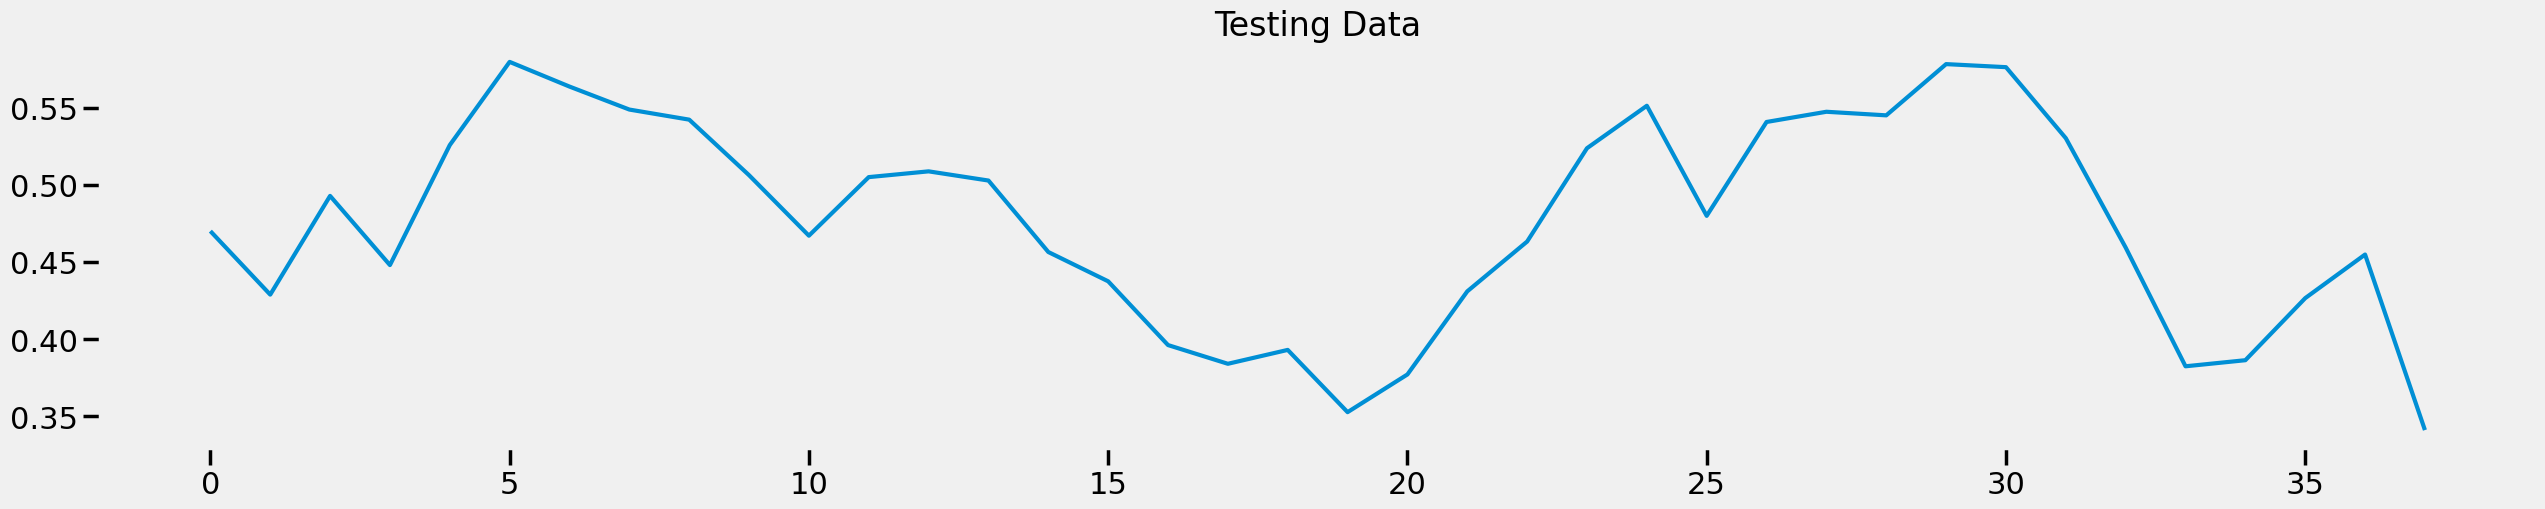

In [711]:
# Define a data plotting function
def show_plot(data, title):
    plt.figure(figsize = (28, 5))
    plt.plot(data, linewidth = 3)
    plt.title(title)
    plt.grid()

show_plot(train_y, 'Training Data')
show_plot(test_y, 'Testing Data')

# Packages used:
https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook

In [310]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))
        
for r in requirements:
    print("{}=={}".format(*r))

plotly==5.9.0
nltk==3.7
matplotlib==3.6.2
spacy==3.4.1
vaderSentiment==3.3.2
keras==2.10.0
tensorflow==2.10.0
pmdarima==2.0.1
numpy==1.21.5
param==1.12.0
wordcloud==1.8.2.2
scipy==1.7.3
pandas==1.4.2
scikit-learn==1.1.2
textblob==0.17.1
statsmodels==0.13.2
seaborn==0.12.0
snscrape==0.4.3.20220106
